# Tema 4

In [125]:
%load_ext asymagic

def menors_que_contenen(r,c,A):
    """
    Calcula el determinant de tots els menors d'ordre un més que contenen
    el menor determinat per les files r i les columnes c
    """
    if len(r) != len(c):
        return None
    for i in r:
        if i >= A.nrows():
            return None
    for i in c:
        if i >= A.ncols():
            return None
    for i in range(A.nrows()):
        if i in r:
            continue
        for j in range(A.ncols()):
            if j in c:
                continue
            ra = sorted(r+[i])
            ca = sorted(c+[j])
            B = A[ra,ca]
            print("Files",ra,"Columnes",ca)
            show("det",B,"=",B.determinant())
            
def completa_quadrats(expr,vi,vf):
    l = len(vi)
    d2 = [diff(expr,t,2)/2 for t in vi]
    zeros = len([t for t in d2 if t != 0])
    if zeros < len(d2) - 1:
        print("Expressió no vàlida")
        return None, None
    d1 = [diff(expr,t) for t in vi]
    d1 = [d1[i] - 2*d2[i]*vi[i] for i in range(l)]
    ti = expr - sum([d2[i]*vi[i]^2 + d1[i]*vi[i] for i in range(l) if d2[i] != 0])
    c = [d1[i]/(2*d2[i]) if d2[i] != 0 else 0 for i in range(l)]
    if zeros == len(d2):
        s = sum([d2[i]*vf[i]^2 for i in range(l)]) == -ti + sum([d2[i]*c[i]^2 for i in range(l)])
        r = [vf[i] == vi[i] + c[i] for i in range(l)]
        return s, r
    ti = expr - sum([d2[i]*vi[i]^2 + d1[i]*vi[i] for i in range(l)])
    ti -= sum([d2[i]*c[i]^2 for i in range(l)])
    k = d2.index(0)
    s = vf[k] == - sum([d2[i]*vf[i]^2 for i in range(l)])/d1[k]
    r = [vf[i] == vi[i] + c[i] if d2[i] != 0 else vf[i] == vi[i] + ti/d1[k] for i in range(l)]
    return s,r

def simplificar_radicals(A):
    """
    Simplifica les arrels quadrades en una matriu o en un vector
    """
    try:
        for i in range(A.nrows()):
            for j in range(A.ncols()):
                A[i,j] = A[i,j]._sympy_().simplify()._sage_()
        return A
    except:
        pass
    try:
        for i in range(A.length()):
            A[i] = A[i]._sympy_().simplify()._sage_()
        return A
    except:
        pass
    try:
        return A._sympy_().simplify()._sage_()
    except:
        pass
    if isinstance(A,list) or isinstance(A,tuple):
        try:
            return [simplificar_radicals(x) for x in A]
        except:
            pass
    return None

The asymagic extension is already loaded. To reload it, use:
  %reload_ext asymagic


## Exercici 1
Calculeu la suma del punt $p=(1,3,3)$ i el vector $\vec u=(0,-1,2)$.

In [6]:
p = vector([1,3,3])
u = vector([0,-1,2])
show(p+u)

(1, 2, 5)

**Observació**: el Sagemath no distingeix entre punts i vectors. De fet, un _vector_ no és més que una llista de nombres reals.

Correspon a l'usuari distingir entre punts i vectors.

## Exercici 2
Trobeu el vector lliure d'origen $p=(3,-1,4)$ i extrem $q=(-1,0,2)$.

In [7]:
p = vector([3,-1,4])
q = vector([-1,0,2])
u = q - p
show(u)

(-4, 1, -2)

## Exercici 3
Donats els punts $(0,1,-2)$ i $(2,-3,2)$, calculeu el seu punt mitjà.

In [8]:
p = vector([0,1,-2])
q = vector([2,-3,2])
m = (p + q)/2
show(m)

(1, -1, 0)

## Exercici 4
Representeu gràficament les rectes d'equacions $x+3y=5$ i $4x-y=4$.

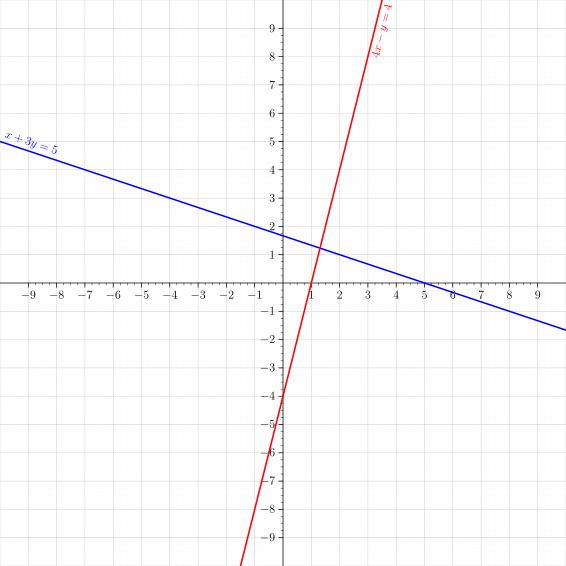

In [9]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

real f(real x)
{
    return (5-x)/3;
}
real g(real x)
{
    return 4*x-4;
}

Canonica(-10,10,-10,10);
draw((-10,f(-10))--(10,f(10)),blue+linewidth(0.55mm));
draw((-10,g(-10))--(10,g(10)),red+linewidth(0.55mm));
path cl = (-10,-10)--(10,-10)--(10,10)--(-10,10)--cycle;
label(rotate(degrees(atan2(-1,3)))*"$x+3y=5$",(-9.5,f(-9.5)),NE,blue);
label(rotate(degrees(atan2(4,1)))*"$4x-y=4$",(3.4,g(3.4)),SE,red);
clip(cl);

## Exercici 5
Calculeu les equacions implícites de la recta i el pla següents:
$$
  \text{(a)}\quad
  \dfrac{x-1}{-1}=\dfrac{y-3}{0}=-z+3\,;\qquad
  \text{(b)}\quad
  (x,y,z)=(1,2,-3)+\alpha (-2,1,3)+\beta (1,2,0)\,.
$$

In [10]:
x, y, z = var('x y z')
p = vector([1,3,3])
u = vector([-1,0,-1])
X = vector([x,y,z])
A = matrix([u,X-p]).T
show(A)

[   -1 x - 1]
[    0 y - 3]
[   -1 z - 3]

In [11]:
menors_que_contenen([0],[0],A)

Files [0, 1] Columnes [0, 1]


'det' [   -1 x - 1]
[    0 y - 3] '=' -y + 3

Files [0, 2] Columnes [0, 1]


'det' [   -1 x - 1]
[   -1 z - 3] '=' x - z + 2

Les equacions implícites de la recta són
$$
  \left.\begin{aligned} 
  y&=3\\
  x-z&=-2
  \end{aligned}\,\right\}\,.
$$

In [12]:
p = vector([1,2,-3])
u = vector([-2,1,3])
v = vector([1,2,0])
A = matrix([u,v,X-p]).T
show(A)

[   -2     1 x - 1]
[    1     2 y - 2]
[    3     0 z + 3]

In [13]:
show(-A.det() == 0)

6*x - 3*y + 5*z + 15 == 0

L'equació implícita del pla és
$$
  6x-3y+5z=-15\,.
$$

## Exercici 6
Calculeu les equacions de tipus vectorial de la recta i el pla següents:
$$
  \text{(a)}\quad
  \left.\begin{aligned} 
  x+2y+4z&=0\\
  2x+5y+2z&=4
  \end{aligned}\,\right\}\,;
  \qquad\text{(b)}\quad
  x-3y+2z=-5\,.
$$

Resolem el primer sistema d'equacions per trobar unes equacions paramètriques de la recta:

In [14]:
x, y, z = var('x y z')
show(solve([x+2*y+4*z==0,2*x+5*y+2*z==4],[x,y]))

[[x == -16*z - 8, y == 6*z + 4]]

Les equacions paramètriques de la recta són
$$
  \left.\begin{aligned} 
  x&=-8-16t\\
  y&=4+6t\\
  z&=t
  \end{aligned}\,\right\}\,,
$$
mentre que la vectorial i la contínua són
$$
  (x,y,z)=(-8,6,0)+t(-16,6,1)\qquad\text{i}\qquad
  \frac{x+8}{-16}=\frac{y-4}{6}=z\,.
$$

Fem el mateix amb l'equació de l'apartat (b) per trobar les equacions paramètriques de pla:

In [15]:
show(solve([x-3*y+2*z==-5],[x]))

[x == 3*y - 2*z - 5]

Les equacions paramètriques de la recta són
$$
  \left.\begin{aligned} 
  x&=-5+3t-2s \\
  y&=t \\
  z&=s
  \end{aligned}\,\right\}\,,
$$
mentre que la vectorial és
$$
  (x,y,z)=(-5,0,0)+t(3,1,0)+s(-2,0,1)\,.
$$

## Exercici 7
Donades les rectes d'equacions
$$
  R_1:\frac{x - 1}{3} = \frac{y + 2}{-2} = \frac{z - 1}{-2}
  \qquad\text{i}\qquad 
  R_2:\left.\begin{aligned}
  7 x - 4 y + 6 z &= 21 \\ 
  - 5 x + 2 y - 4 z &= -13 
  \end{aligned}\;\right\}\,,
$$
determineu, si és possible, l'equació implícita del pla que les conté.

El vector director de la primera és $\vec u=(3,-2,-2)$

In [16]:
u = vector([3,-2,-2])

Trobem ara el vector director de la segona

In [17]:
x, y, z = var('x y z')
eq1 = 7*x - 4*y + 6*z  == 21
eq2 = -5*x + 2*y - 4*z == -13
show(solve([eq1,eq2],[x,y,z]))

[[x == -2/3*r1 + 5/3, y == 1/3*r1 - 7/3, z == r1]]

Les equacions paramètriques de la segon recta són
$$
  \left.\begin{aligned} 
  x&=\frac{-2t+5}{3} \\
  y&=\frac{t-7}{3} \\
  z&=t
  \end{aligned}\,\right\}\,,
$$
i el vector director de la segona és $\vec v = \left(-\dfrac{2}{3},\dfrac{1}{3},1\right)\simeq(-2,1,3)$, és a dir, les rectes no són paral·les.

In [18]:
v = vector([-2,1,3])

Comprovem, doncs, si es tallen o s'encreuen. Escrivim, en primer lloc, les equacions implícites de la primera recta:

In [19]:
eq3 = (x-1)/3 == (y+2)/(-2)
eq4 = (x-1)/3 == (z-1)/(-2)

I ara resolem el sistema d'equacions format per les equacions implícites de les dues rectes

In [20]:
show(solve([eq1,eq2,eq3,eq4],[x,y,z]))

[[x == 1, y == -2, z == 1]]

Com que les rectes es tallen en el punt $(1,-2,1)$, l'equacio del pla que les conté és

In [21]:
x, y, z = var('x y z')
p = vector([1,-2,1])
X = vector([x,y,z])
show(matrix([u,v,X-p]).det() == 0)

-4*x - 5*y - z - 5 == 0

Si canviem el signe, l'equació és $4x+5y+z=-5$.

## Exercici 8
Trobeu l'equació de la recta que és paral·lela a la recta
$$
  \left.\begin{aligned} 
  x-2y+3z-2&=0\\
  -x+y+z&=0
  \end{aligned}\,\right\}
$$
i passa pel punt $(1,2,1)$.

Una recta parel·lela a aquesta serà de la forma
$$
  \left.\begin{aligned} 
  x-2y+3z&=D_1\\
  -x+y+z&=D_2
  \end{aligned}\,\right\}
$$
ja que és evident que les dues tenen el mateix vector director. Per calcular la $D_1$ i la $D_2$, fem el següent:

In [22]:
A = matrix([[1,-2,3],[-1,1,1]])
p = vector([1,2,1])
show(A * p)

(0, 2)

La recta paral·lela té equació implícita
$$
  \left.\begin{aligned} 
  x-2y+3z&=0\\
  -x+y+z&=2
  \end{aligned}\,\right\}\,.
$$

## Exercici 9
Determineu el pla que és paral·lel al pla
$$(x,y,z)=(-1,2,2)+\alpha (3,1,-1)+\beta (1,-3,-1)$$
i passa pel punt $(-5,3,-2)$.

El pla paral·lel que ens demanen té equació vectorial
$$(x,y,z)=(-5,3,-2)+\alpha (3,1,-1)+\beta (1,-3,-1)$$
i la seva equació implícita s'obté de la forma següent:

In [23]:
p = vector([-5,3,-2])
u = vector([3,1,-1])
v = vector([1,-3,-1])
A = matrix([u,v,X-p]).T
show(A)

[    3     1 x + 5]
[    1    -3 y - 3]
[   -1    -1 z + 2]

In [24]:
eq = A.det() == 0
# show(eq)
show(-eq/2)

2*x - y + 5*z + 23 == 0

L'equació implícita és
$$
  2x-y+5z=-23\,.
$$

## Exercici 10
Donats el punt $p=(-3,-3,-2)$ i la recta i el pla d'equacions
$$
  R:\left.\begin{aligned} 
  2 x - 2 y + z &= 8 \\ 
  - 5 x + 4 y - 3 z &= -20 
  \end{aligned}\;\right\}\qquad\text{i}\qquad P:x + 2 z = 1\,,
$$
trobeu el vector director de la recta que passa pel punt $p$, és paral·lela al pla $P$ i talla la recta $R$.

Escrivim les equacions impícites de la recta $R$ i del pla $P$ de manera ràpida:

In [27]:
x,y,z = var('x y z')
X = vector([x,y,z])
w1 = vector([2,-2,1])
w2 = vector([-5,4,-3])
w3 = vector([1,0,2])

Equacions implícites de la recta $R$:

In [28]:
R1 = w1*X == 8
R2 = w2*X == -20
show(R1)
show(R2)

2*x - 2*y + z == 8

-5*x + 4*y - 3*z == -20

Equació del pla

In [29]:
P = x+2*z == 1
show(P)

x + 2*z == 1

Per saber la posició relativa del pla i la recta, resolem el sistema d'equacions

In [31]:
show(solve([P,R1,R2],[x,y,z]))

[[x == 7, y == (3/2), z == -3]]

La recta $R$ i el pla $P$ són secants.

L'equació del pla paral·lel a $P$ que passa pel punt $p$ és

In [33]:
p = vector([-3,-3,-2])
Q = w3*X == w3*p
show(Q)

x + 2*z == -7

La intersecció del pla Q amb la recta $R$ és

In [34]:
q = solve([R1,R2,Q],[x,y,z])
show(q)

[[x == 15, y == (11/2), z == -11]]

Finalment, tenim que

In [35]:
p1 = vector([15,11/2,-11])
show(p1-p)

(18, 17/2, -9)

El vector director de la recta que passa pel punt $p$, és paral·lela al pla $P$ i talla la recta $R$ és $(36,17,-18)$.

## Exercici 11
Determineu la posició relativa de les rectes i plans següents i trobeu la seva intersecció, si n'hi ha:
1. $\dfrac{x+1}{2}=y-3=2-z\quad \text{i} \quad \dfrac{x-1}{-2}=\dfrac{y+1}{7}=\dfrac{z}{3}$.
1. $x+2y+3z=11\quad \text{i} \quad (x,y,z)=(-1,3,4)+\alpha(1,1,-1)+\beta(5,-1,-1)$.
1. $\left.\begin{aligned} 
   3x+y+z&=-3\\
   -x+y+z&=9
  \end{aligned}\,\right\}\quad \text{i} \quad x+2y+3z=11$.

En el primer cas tenim la recta $R_1$ que passa pel punt $p=(-1,3,2)$ i té vector director $\vec u=(2,1,-1)$ i la recta $R_2$ que passa pel punt $q=(1,-1,0)$ i té vector director $\vec v=(-2,7,3)$.

In [36]:
p = vector([-1,3,2])
u = vector([2,1,-1])
q = vector([1,-1,0])
v = vector([-2,7,3])
A = matrix([u,v,q-p]).T
show(A.det())

4

Com que el determinant és no nul, les rectes s'encreuen.

En el segon cas, per calcular l'equació implícta del segon pla fem el següent:

In [37]:
x, y, z = var('x y z')
p = vector([-1,3,4])
u = vector([1,1,-1])
v = vector([5,-1,-1])
A = matrix([u,v,X-p]).T
## show(A.det() == 0)
show(-A.det()/2 == 0)

x + 2*y + 3*z - 17 == 0

Els plans d'equacions $x+2y+3z=11$ i $x+2y+3z=17$ són estrictament paral·lels.

En el tercer cas, resolem el sistema d'equacions format per les equacions implícites de la recta i el pla:

In [38]:
show(solve([3*x + y + z== -3,-x + y + z == 9,x + 2*y + 3*z == 11],[x,y,z]))

[[x == -3, y == 4, z == 2]]

Com que el sistema és compatible determinat, el pla i la recta són secants i el punt de tall és $(-3,4,2)$.

## Exercici 12
Estudieu la posició relativa dels plans d'equacions
$$
  \left.\begin{aligned}
  mx+y+z &= 1 \\
  4x+2y+2z &= 2m \\
  2x+y+mz &= 1
  \end{aligned}\right\}
$$
en funció del paràmetre $m$. 

Escrivim la matriu dels coeficients de les incògnites i els termes independents:

In [39]:
m = var('m')
A = matrix([[m,1,1],[4,2,2],[2,1,m]])
B = vector([1,2*m,1])
d = expand(A.det())
show(d)

2*m^2 - 6*m + 4

A continuació, trobem les arrels d'aquest polinomi:

In [40]:
show(solve(d == 0,m))

[m == 1, m == 2]

Si $m\neq 1$ i $m\neq 2$, el sistema és compatible determinat i els tres plans es tallen en un punt. Anem a trobar-lo:

In [41]:
x, y, z = var('x y z')
X = vector([x,y,z])
AX = A * X
eqs = [AX[i] == B[i] for i in range(3)]
show(eqs)

[m*x + y + z == 1, 4*x + 2*y + 2*z == 2*m, m*z + 2*x + y == 1]

In [42]:
show(solve(eqs,[x,y,z]))

[[x == -(m - 1)/(m - 2), y == (m^2 + m - 4)/(m - 2), z == -1]]

Per tant, si $m\neq 1$ i $m\neq 2$, els tres plans es tallen el punt
$$
  \left(-\frac{m-1}{m-2},\frac{m^2+m-4}{m-2},-1\right)\,.
$$

Si $m=1$, el sistema d'equacions és
$$
  \left.\begin{aligned}
  x+y+z &= 1 \\
  4x+2y+2z &= 2 \\
  2x+y+z &= 1
  \end{aligned}\right\}
$$
i la seva solució,

In [43]:
show(solve([eq.subs(m=1) for eq in eqs],[x,y,z]))

[[x == 0, y == -r2 + 1, z == r2]]

és a dir, el sistema és compatible indeternminat i els tres plans es tallen en la recta d'equació vectorial $(x,y,z)=(0,1,0)+t(0,-1,1)$. D'altra banda, la segona equació és el doble que la tercera; per tant, tenim dos plans coincidents (el segon i el tercer) i el primer pla és secant als dos anteriors.

Finalment, si $m=2$, el sistema d'equacions és
$$
  \left.\begin{aligned}
  2x+y+z &= 1 \\
  4x+2y+2z &= 4 \\
  2x+y+2z &= 1
  \end{aligned}\right\}
$$
i té solució:

In [44]:
show(solve([eq.subs(m=2) for eq in eqs],[x,y,z]))

[]

és a dir, és incompatible.

El primer i el segon pla són paral·lels estrictes ja que els coeficients de $x$, $y$ i $z$ de la segona equació 
són el doble que els de la primera, però els termes independents no compleixen la mateixa proporció. 
El tercer és secant als dos primers.

## Exercici 13
Analitzeu si el sistema següent és una referència de l'espai $V_3$
$$
  \big\{ (1,-1,0);\,(1,4,1),(3,1,2),(5,-2,3) \big\}\,.
$$

Tenim un punt i tres vectors, per tant, només cal comprovar que els tres vectors formen una base de $V_3$.

In [45]:
u1 = vector([1,4,1])
u2 = vector([3,1,2])
u3 = vector([5,-2,3])
C = matrix([u1,u2,u3]).T
show(C)

[ 1  3  5]
[ 4  1 -2]
[ 1  2  3]

In [46]:
show(C.det())

0

Els tres vectors són linealment dependents, per tant, no es tracta d'una referència.

## Exercici 14
Determineu les coordenades en la referència canònica del punt que té coordenades $(5,4,3)$ en la referència
$$\mathcal{R}'=\{(3,4,-1);\,(0,-2,1),(2,-1,1),(1,2,3)\}\,.$$

Tenim que $p=(1,2,-1)_{\mathcal{R}'}$ i hem de determinar les seves coordenades en la referència canònica:

In [53]:
O = vector([3,4,-1])
u1 = vector([0,-2,1])
u2 = vector([2,-1,1])
u3 = vector([1,2,3])
p1 = vector([5,4,3])

In [54]:
p = O + p1[0]*u1 + p1[1]*u2 + p1[2]*u3
show(p)

(14, -4, 17)

Per tant, $p=(1,2,-1)_{\mathcal{R}'}=(14,-4,17)$.

El canvi de coordenades de la referència $\mathcal{R}'$ a la referència canònica vé donat per
$$
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right) = 
  \left(\begin{array}{r} 3 \\ 4 \\ -1 \end{array}\right)
  +\left(\begin{array}{rrr} 
   0 &  2 & 1 \\
  -2 & -1 & 2 \\
   1 &  1 & 3
  \end{array}\right)
  \left(\begin{array}{c} x' \\ y' \\ z' \end{array}\right)\,,
$$

és a dir, també es pot fer

In [55]:
C = matrix([u1,u2,u3]).T
show(O + C * p1)

(14, -4, 17)

## Exercici 15
Calculeu les coordenades del punt $(2,-2)$ en la referència
$$\mathcal{R}'=\big\{(-4,1);\,(2,1),(-1,1)\big\}\,.$$
Representeu-ho gràficament.

Per trobar aquestes coordenades, hem de posar
$$
  (2,-2)=(-4,1)+x'(2,1)+y'(-1,1)\,.
$$

In [56]:
x1, y1 = var('x1 y1')
p = vector([2,-2])
O = vector([-4,1])
u1 = vector([2,1])
u2 = vector([-1,1])
cl = O + x1*u1 + y1*u2
show(cl)

(2*x1 - y1 - 4, x1 + y1 + 1)

In [57]:
show(solve([cl[0] == p[0],cl[1] == p[1]],[x1,y1]))

[[x1 == 1, y1 == -4]]

Les coordenades de $p$ en la referència $\mathcal{R}'$ són $(1,-4)$, és a dir, $p=(2,-2)=(1,-4)_{\mathcal{R}'}$.

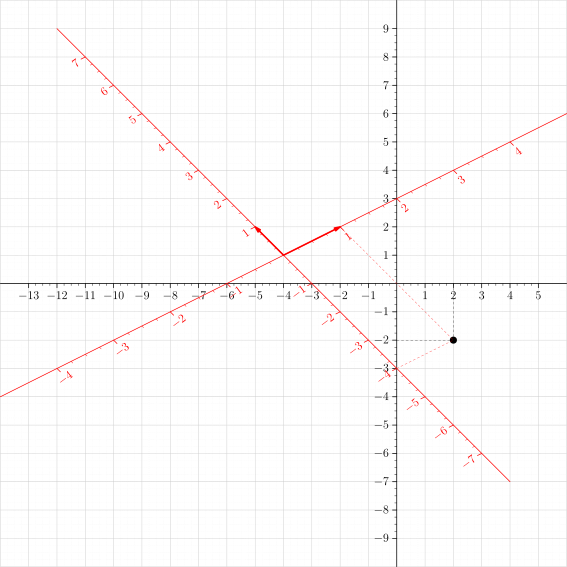

In [61]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

pair F=(2,-2);

Canonica(-14,6,-10,10);
picture p = Coordenades(-5,5,-8,8,color=red,tickx=0.12,ticky=0.075,base=true,quadricula=false);
transform tr = Referencia((-4,1),(2,1),(-1,1));
pair F1 = inverse(tr)*F;
dot(p,F1,black+2.5mm);
draw((F.x,0)--F--(0,F.y),linetype("8 8 8 8")+linewidth(0.1mm)+black);
draw(p,(F1.x,0)--F1--(0,F1.y),linetype("8 8 8 8")+linewidth(0.1mm)+red);
add (tr*p);

## Exercici 16
Trobeu el punt mitjà (expressat en la referència canònica) del segment amb extrems de coordenades $(2,4,1)$ i $(-3,1,0)$ en la referència
$$
  \mathcal{R}'=\big\{(0,3,-2);\,(4,1,-1),(2,0,-1),(3,1,3)\big\}\,.
$$

Les coordenades del punt mitjà en la referència $\mathcal{R}'$ són

In [62]:
p1 = vector([2,4,1])
q1 = vector([-3,1,0])
m1 = (p1+q1)/2
show(m1)

(-1/2, 5/2, 1/2)

és a dir, el punt mitjà és $m=\left(-\dfrac{1}{2},\dfrac{5}{2},\dfrac{1}{2}\right)_{\mathcal{R}'}$.

Ara hem de procedir com a l'exercici anterior per calcular les seves coordenades en la referència canònica.

In [63]:
O = vector([0,3,-2])
u1 = vector([4,1,-1])
u2 = vector([2,0,-1])
u3 = vector([3,1,3])

In [64]:
show(O + m1[0]*u1 + m1[1]*u2 + m1[2]*u3)

(9/2, 3, -5/2)

Les coordenades del punt mitjà en la referència canònica són $m=\left(\dfrac{9}{2},3,-\dfrac{5}{2}\right)$

## Exercici 17
Es considera la referència
$$\mathcal{R}'=\big\{(2,1);\,(1,1),(-1,1)\big\}\,.$$
1. Determineu la fórmula del canvi de referència de la referència $\mathcal{R}'$ a la referència canònica.
1. Calculeu l'equació en la referència $\mathcal{R}'$ de la recta que en la referència canònica té equació
$$2x-3y=2\,.$$

La fórmula del canvi de referència és
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} 2 \\ 1 \end{array}\right) 
  + \left(\begin{array}{rr}
  1 & -1 \\
  1 &  1 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\,. 
$$

In [65]:
x, y = var('x y')
eq = 2*x - 3*y - 2 == 0
show(eq)

2*x - 3*y - 2 == 0

In [66]:
B = vector([2,1])
C = matrix([[1,-1],[1,1]])
show(C)

[ 1 -1]
[ 1  1]

In [67]:
x1, y1 = var('x1 y1')
X1 = vector([x1,y1])
x, y = B + C * X1
show(x)
show(y)

x1 - y1 + 2

x1 + y1 + 1

In [69]:
eq1 = eq.subs(x=x,y=y).expand()
show(eq1)

-x1 - 5*y1 - 1 == 0

L'equació de la recta en la referència $\mathcal{R}'$ és $-x'-5y'=1$, o bé, $x'+5y'=-1$.

## Exercici 18
Es considera la referència de $P_2$
$$\mathcal{R}'=\left\{ (-2,1);\,(3,-1),(4,3)\right\}\,.$$
1. Determineu la fórmula del canvi de referència de la referència canònica a la referència $\mathcal{R}'$.
1. Calculeu l'equació en la referència canònica de la recta que en la referència $\mathcal{R}'$ té equació
$$x'+2y'=-2\,.$$

La fórmula del canvi de referència de $\mathcal{R}'$ a la referència canònica és
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} -2 \\ 1 \end{array}\right) 
  + \left(\begin{array}{rr}
   3 & 4 \\
  -1 & 3 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\,. 
$$
Si aïllem $(x',y')$ en funció de $(x,y)$, tindrem la fórmula del canvi de referència de la referència canònica a la referència $\mathcal{R}'$.
$$
  \left(\begin{array}{c} x' \\ y' \end{array}\right) 
  = \left(\begin{array}{rr}
   3 & 4 \\
  -1 & 3 \\
  \end{array}\right)^{-1}
  \left[
    \left(\begin{array}{c} x \\ y \end{array}\right)
    - \left(\begin{array}{r} -2 \\ 1 \end{array}\right) 
  \right]\,. 
$$

In [70]:
B = vector([-2,1])
C = matrix([[3,4],[-1,3]])
show(C)

[ 3  4]
[-1  3]

In [71]:
x1, y1 = var('x1 y1')
eq1 = x1 + 2*y1 + 2 == 0
show(eq1)

x1 + 2*y1 + 2 == 0

In [73]:
x, y = var('x y')
X = vector([x,y])
x1, y1 = C.inverse() * (X - B)
show(x1)
show(y1)

3/13*x - 4/13*y + 10/13

1/13*x + 3/13*y - 1/13

In [75]:
eq = eq1.subs(x1=x1,y1=y1).expand()
## show(eq)
show(13*eq)

5*x + 2*y + 34 == 0

L'equació de la recta en la referència canònica és $5x+2y+34=0$.

## Exercici 19
Es consideren les referències de $P_2$
$$\mathcal{R}'=\{(4,-2);\,(2,-1),(1,2)\} \qquad \text{i} \qquad \mathcal{R}''=\{(-5,5);\,(3,1),(-1,3)\}\,.$$
1. Determineu la fórmula del canvi de referència de la referència $\mathcal{R}''$ a la referència $\mathcal{R}'$.
2. Calculeu l'equació en la referència $\mathcal{R}''$ de la recta que en la referència $\mathcal{R}'$ té equació
$$x'-2y'=-1\,.$$

La fórmula del canvi de coordenades de la referència $\mathcal{R}'$ a la referència canònica és
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} 4 \\ -2 \end{array}\right) 
  + \left(\begin{array}{rr}
   2 & 1 \\
  -1 & 2 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\,,
$$
mentre que la del canvi de coordenades de la referència $\mathcal{R}''$ a la referència canònica és
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} -5 \\ 5 \end{array}\right) 
  + \left(\begin{array}{rr}
   3 & -1 \\
   1 &  3 \\
  \end{array}\right) 
  \left(\begin{array}{c} x'' \\ y'' \end{array}\right)\,,
$$

Per tant, tindrem que
$$
  P+CX'=Q+DX''\,,\qquad\text{on}\qquad
  P = \left(\begin{array}{r} 4 \\ -2 \end{array}\right)\,,\qquad
  C = \left(\begin{array}{rr}
   2 & 1 \\
  -1 & 2 \\
  \end{array}\right)\,,\qquad
  X' = \left(\begin{array}{c} x' \\ y' \end{array}\right)\,,\qquad
  Q = \left(\begin{array}{r} -5 \\ 5 \end{array}\right) \,,\qquad
  D = \left(\begin{array}{rr}
   3 & -1 \\
   1 &  3 \\
  \end{array}\right)\quad\text{i}\quad
  X'' = \left(\begin{array}{c} x'' \\ y'' \end{array}\right)\,.
$$

Per tenir la fórmula del canvi de corrdenades de $\mathcal{R}''$ a la referència $\mathcal{R}'$, hem de tenir $X'$ en funció de $X''$. Si aïllem, tenim que
$$
  X'=C^{-1}\big(Q - P + DX''\big)\,.
$$

A continuació fem els càlculs

In [76]:
C = matrix([[2,1],[-1,2]])
D = matrix([[3,-1],[1,3]])
P = vector([4,-2])
Q = vector([-5,5])

In [79]:
x1, y1 = var('x1 y1')
eq1 = x1 - 2*y1 + 1 == 0
show(eq1)

x1 - 2*y1 + 1 == 0

In [80]:
x2, y2 = var('x2 y2')
X2 = vector([x2,y2])
x1, y1 = C.inverse() * (Q - P + D * X2)
show(x1)
show(y1)

x2 - y2 - 5

x2 + y2 + 1

L'expressió del canvi de referència de la referència $\mathcal{R}''$ a la referència $\mathcal{R}'$ és
$$
  \left(\begin{array}{c} x' \\ y' \end{array}\right) 
  = \left(\begin{array}{r} -5 \\ 1 \end{array}\right) 
  + \left(\begin{array}{rr}
   1 & -1 \\
   1 &  1 \\
  \end{array}\right) 
  \left(\begin{array}{c} x'' \\ y'' \end{array}\right)\,,
$$

In [81]:
eq2 = eq1.subs(x1=x1,y1=y1).expand()
show(eq2)

-x2 - 3*y2 - 6 == 0

Si canviem el signe, tenim que l'equació de la recta en la referència $\mathcal{R}''$ és $x''+3y''=-6$.

## Exercici 20
La representació del punt $p$ en la referència
$$
  \mathcal{R}'=\left\{(-2,-3,-1);(1,-1,1),(-1,2,-1),(2,-1,1)\right\}
$$ 
és $p=(-2,2,-1)_{\mathcal{R}'}$. Quines són les seves coordenades en la referència 
$$
  \mathcal{R}''=\left\{(2,-1,-2);(-3,1,1),(2,2,-1),(2,1,-1)\right\}\,\text{?}
$$

L'expressió del canvi de coordenades de la referència $\mathcal{R}'$ a la referència canònica és
$$
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right) = 
  \left(\begin{array}{r} -2 \\ -3 \\ -1 \end{array}\right)
  +\left(\begin{array}{rrr} 
    1 & -1 &  2 \\  
   -1 &  2 & -1 \\  
    1 & -1 &  1
   \end{array}\right)
  \left(\begin{array}{c} x' \\ y' \\ z' \end{array}\right)\,,
$$
mentre que l'expressió del canvi de coordenades de la referència $\mathcal{R}''$ a la referència canònica és
$$
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right) = 
  \left(\begin{array}{r} 2 \\ -1 \\ -2 \end{array}\right)
  +\left(\begin{array}{rrr} 
   -3 &  2 &  2 \\  
    1 &  2 &  1 \\  
    1 & -1 & -1
   \end{array}\right)
  \left(\begin{array}{c} x'' \\ y'' \\ z'' \end{array}\right)\,.
$$

Aleshores:

In [83]:
P = vector([-2,-3,-1])
Q = vector([2,-1,-2])
X1 = vector([-2,2,-1])
C = matrix([[1,-1,2],[-1,2,-1],[1,-1,1]])
D = matrix([[-3,2,2],[1,2,1],[1,-1,-1]])

In [84]:
X2 = D.inverse() * (P - Q + C * X1)
show(X2)

(18, -35, 57)

Per tant, less coordenades de del punt $p$ en la referència $\mathcal{R}''$ són 
$$
  p=(18,-35,57)_{\mathcal{R}''}\,.
$$

## Exercici 21
Sabem que l'origen de la referència $\cal R'$ és el punt $(4,1,5)$ i que les coordenades dels punts $(2,2,1)$, $(-4,-1,2)$ i $(4,2,-1)$ en aquesta referència són $(-3,6,13)_{\mathcal{R}'}$, $(-6,11,19)_{\mathcal{R}'}$ i $(-1,6,17)_{\mathcal{R}'}$. Trobeu la referència $\mathcal{R}'$.

L'expressió del canvi de coordenades és
$$
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right) = 
  \left(\begin{array}{r} 4 \\ 1 \\ 5 \end{array}\right)
  +C\left(\begin{array}{c} x' \\ y' \\ z' \end{array}\right)\,,
$$
on $C$ és la matriu del canvi de base de la base continguda a $\mathcal{R}'$.

Aleshores tindrem que
$$
  \left(\begin{array}{r} 2 \\ 2 \\ 1 \end{array}\right) = 
  \left(\begin{array}{r} 4 \\ 1 \\ 5 \end{array}\right)
  +C\left(\begin{array}{r} -3 \\ 6 \\ 13 \end{array}\right)\,,\qquad
  \left(\begin{array}{r} -4 \\ -1 \\ 2 \end{array}\right) = 
  \left(\begin{array}{r} 4 \\ 1 \\ 5 \end{array}\right)
  +C\left(\begin{array}{r} -6 \\ 11 \\ 19 \end{array}\right)\,,\qquad\text{i}\qquad
  \left(\begin{array}{r} 4 \\ 2 \\ -1 \end{array}\right) = 
  \left(\begin{array}{r} 4 \\ 1 \\ 5 \end{array}\right)
  +C\left(\begin{array}{r} -1 \\ 6 \\ 17 \end{array}\right)\,.
$$

O, de manera equivalent,
$$
  C\left(\begin{array}{r} -3 \\ 6 \\ 13 \end{array}\right) = 
  \left(\begin{array}{r} 2 \\ 2 \\ 1 \end{array}\right)
  - \left(\begin{array}{r} 4 \\ 1 \\ 5 \end{array}\right)\,,\qquad
  C\left(\begin{array}{r} -6 \\ 11 \\ 19 \end{array}\right) =
  \left(\begin{array}{r} -4 \\ -1 \\ 2 \end{array}\right) -
  \left(\begin{array}{r} 4 \\ 1 \\ 5 \end{array}\right)
  \qquad\text{i}\qquad
  C\left(\begin{array}{r} -1 \\ 6 \\ 17 \end{array}\right) =
  \left(\begin{array}{r} 4 \\ 2 \\ -1 \end{array}\right) - 
  \left(\begin{array}{r} 4 \\ 1 \\ 5 \end{array}\right)\,.
$$

In [85]:
B = vector([4,1,5])
p1 = vector([2,2,1])
p2 = vector([-4,-1,2])
p3 = vector([4,2,-1])
p11 = vector([-3,6,13])
p21 = vector([-6,11,19])
p31 = vector([-1,6,17])

In [86]:
P = matrix([p11,p21,p31]).T
Q = matrix([p1 - B,p2 - B,p3 - B]).T
show(P)

[-3 -6 -1]
[ 6 11  6]
[13 19 17]

In [87]:
show(Q)

[-2 -8  0]
[ 1 -2  1]
[-4 -3 -6]

In [88]:
C = Q * P.inverse()
show(C)

[-1 -3  1]
[-2 -3  1]
[ 1  2 -1]

Per tant, la referència és
$$
  \mathcal{R}'= \left\{(4,1,5);(-1,-2,1),(-3,-3,2),(1,1,-1)\right\}
$$

## Exercici 22
Trobeu l'equació implícita en la referència $\mathcal{R}'=\big\{(1,4);\,(-3,1),(-1,0)\big\}$ de la recta que passa pel punt $(-3,2)$ i és paral·lela a la recta  d'equació implícita
$$x'+y'=-4$$
en la referència $\mathcal{R}'$.

Les rectes paral·leles a la recta d'equació $x'+y'=-4$ són de la forma
$$
  x'+y'=C\,.
$$
Per determinar $C$, necessitem les coordenades del punt $p=(-3,2)$ en la referència $\mathcal{R}'$. Anem a calcular-les a partir de la igualtat
$$
  (-3,2) = (1,4) + x'(-3,1) + y'(-1,0)\,.
$$

In [92]:
x1, y1 = var('x1 y1')
eqs = [-3*x1 - y1 + 1 == -3, x1 + 4 == 2]
show(eqs)

[-3*x1 - y1 + 1 == -3, x1 + 4 == 2]

In [94]:
show(solve(eqs,[x1,y1]))

[[x1 == -2, y1 == 10]]

In [95]:
w = vector([1,1])
X1 = vector([x1,y1])
eq1 = w * X1 == w * vector([-2,10])
show(eq1)

x1 + y1 == 8

L'equació implícita en la referència $\mathcal{R}'$ de la recta demanada és $x'+y'=8$.

## Exercici 23
Analitzeu la posició relativa de les dues rectes de $P_3$ que tenen equacions
$$\dfrac{x'-2}{-3}=\dfrac{y'+1}{-2}=\dfrac{z'+1}{1} \qquad \text{i} \qquad \dfrac{x'-3}{2}=\dfrac{y'-2}{-1}=\dfrac{z'}{-2}$$
en la referència $\mathcal{R}'=\{(-1,0,2);\,(-1,2,3),(1,3,2),(0,1,1)\}$.

El fet que les rectes sigui paral·leles o no, només depèn de si els seus vectors directors $\vec u=(-3,-2,1)_{\mathcal{B}'}$ i $\vec v=(2,-1,-2)_{\mathcal{B}'}$ són proporcionals. Com que és evident que no ho són, les dues rectes no són paral·leles.

La primera recta passa pel punt $p=(2,-1,-1)_{\mathcal{R}'}$ i la segona pel punt $q=(3,2,0)_{\mathcal{R}'}$. Aleshores, les rectes es tallen si, i només si, els vectors $\vec u$, $\vec v$ i $\overrightarrow{pq}$ són linealment dependents.

In [98]:
u1 = vector([-3,-2,1])
v1 = vector([2,-1,-2])
p1 = vector([2,-1,-1])
q1 = vector([3,2,0])
show(matrix([u1,v1,q1-p1]).T)

[-3  2  1]
[-2 -1  3]
[ 1 -2  1]

In [99]:
show(matrix([u1,v1,q1-p1]).T.det())

0

Com que el determinant s'anul·la, les rectes són secants.

Per saber si són perpendiculars, hem de calcular les components dels seus vectors directors en la base canònica.

In [100]:
B = vector([-1,0,2])
w1 = vector([-1,2,3])
w2 = vector([1,3,2])
w3 = vector([0,1,1])
C = matrix([w1,w2,w3]).T
u = C * u1
v = C * v1
show(u)
show(v)

(1, -11, -12)

(-3, -1, 2)

In [101]:
show(u*v)

-16

Les rectes no són perpendiculars. L'angle que formen serà

In [102]:
alfa = N(180 * acos(u*v / (u.norm() * v.norm()))/pi,digits=5)
show(alfa)

105.20

Finalment, anem a calcular el punt de tall resolent un sistema de quatre equacions amb tres incògnites:

In [103]:
x1, y1, z1 = var('x1 y1 z1')
eq1 = (x1-2)/(-3)==(y1+1)/(-2)
eq2 = (x1-2)/(-3)==z1+1
eq3 = (x1-3)/2==(y1-2)/(-1)
eq4 = (x1-3)/2==z1/(-2)
show(solve([eq1,eq2,eq3,eq4],[x1,y1,z1]))

[[x1 == 5, y1 == 1, z1 == -2]]

Es tallen en el punt de coordenades $(5,1,-2)$ en la referència $\mathcal{R}'$. Les seves coordenades en la referència canònica són

In [109]:
r1 = vector([5,1,-2])
r = B + r1[0]*w1 + r1[1]*w2 + r1[2]*w3
r = B + C * r1
show(r)

(-5, 11, 17)

Per tant, les dues rectes es tallen en el punt $(-5,11,17)$ i formen un angle de $105.20^\circ$.

## Exercici 24
Calculeu la distància del punt $(3,1,2)$ al punt $(2,3,0)$.

La distància entre dos punts és la norma del vector que els uneix:

In [110]:
p = vector([3,1,2])
q = vector([2,3,0])
u = q - p
show(u.norm())

3

La distància és $d(p,q)=3$.

## Exercici 25
Trobeu un vector associat al pla que passa pel punt $p=(1,2,-4)$ i té vectors directors $\vec u=(2,-3,-2)$ i $\vec v=(-1,2,3)$.

In [111]:
u = vector([2,-3,-2])
v = vector([-1,2,3])
show(u.cross_product(v))

(-5, -4, 1)

Un vector associat és $\vec u\times\vec v=(-5,-4,1)$.

## Exercici 26
Donades les rectes d'equacions
$$
  R_1:x - 1 = y - 4 = z - 2
  \qquad\text{i}\qquad
  R_2:\left.\begin{aligned}
  - x + 2 y - z &= 3 \\ 
  x - 3 y + 2 z &= 9
  \end{aligned}\right\}\,,
$$
determineu, si és possible, l'equació implícita del pla que les conté.

Determinem en primer lloc la posició relativa de les dues rectes. El vector director de la primera recta és

In [112]:
u = vector([1,1,1])
show(u)

(1, 1, 1)

i el vector director de la segona

In [113]:
w1 = vector([-1,2,-1])
w2 = vector([1,-3,2])
v = w1.cross_product(w2)
show(v)

(1, 1, 1)

Com que els vectors directors són proporcionals, les rectes són paral·leles, pot ser que coincidents o paral·leles esctrictes. Anem a veure si tenen algun punt en comú: 

In [114]:
x, y, z = var('x y z')
eq1 = x-1 == y-4
eq2 = x-1 == z-2
eq3 = -x+2*y-z == 3
eq4 = x-3*y+2*z == 9
show(solve([eq1,eq2,eq3,eq4],[x,y,z]))

[]

Com que no es tallen són paral·leles estrictes. El pla que busquem ha de contenir la segona recta, per tant, ha de ser del feix de plans que contenen aquesta recta:

In [115]:
a, b = var('a b')
P = a*(-x+2*y-z-3) + b*(x-3*y+2*z-9) == 0
show(P)

-a*(x - 2*y + z + 3) + b*(x - 3*y + 2*z - 9) == 0

i ha de passar pel punt $(1,4,2)$ de la primera recta. Per tant, s'ha de complir que

In [116]:
eq = P.subs(x=1,y=4,z=2)
show(eq)

2*a - 16*b == 0

Com que $a=8$ i $b=1$ és una solució d'aquesta equació, l'equació del pla que conté les dues rectes (hem canviat el signe) és

In [117]:
show(P.subs(a=8,b=1))

-7*x + 13*y - 6*z - 33 == 0

Les rectes són estrictament paral·leles i el pla que les conté, canviant de signe el resultat obtingut, té equació $7x-13y+6z+33=0$.

## Exercici 27
Determineu si són perpendiculars o no les rectes i plans següents:
1. $\dfrac{x+1}{2}=y-3=\dfrac{z-2}{-1} \quad \text{i} \quad \dfrac{x+1}{2}=\dfrac{y-3}{-7}=\dfrac{z-2}{-3}$;
2. $-x+2y-3z=0 \quad \text{i} \quad 2x+y+3z=-2$;
2. $\dfrac{x-4}{-1}=y=\dfrac{z+1}{0} \quad \text{i} \quad x-y=-2$.

1. En el primer cas, els vectors directors de les dues rectes són $\vec u=(2,1,-1)$ i $\vec v=(2,-7,-3)$.

In [118]:
u = vector([2,1,-1])
v = vector([2,-7,-3])
show(u * v)

0

Les dues rectes són perpendiculars.

2. Els vectors associats als dos plans són $\vec u=(-1,2,-3)$ i $\vec v=(2,1,3)$.

In [119]:
u = vector([-1,2,-3])
v = vector([2,1,3])
show(u.dot_product(v))

-9

Els dos plans no són perpendiculars.

3. En el tercer cas, el vector director de la recta és $\vec u=(-1,1,0)$ i el vector associat al pla $\vec v=(1,-1,0)$. Com que són múltiple un de l'altre, la recta i el pla són perpendiculars.

## Exercici 28
Trobeu l'equació del pla que passa pel punt $(1,0,3)$ i és perpendicular a la recta
$$\frac{x-7}{1}=\frac{y}{5}=\frac{z-2}{3} \,. $$

Si la recta i el pla són perpendiculars, el vector $\vec u=(1,5,3)$ és associat (perpendicular) al pla. Així, l'equació del pla serà
$$
  x+5y+3z=D\,.
$$
Calculem la $D$:

In [122]:
x, y, z = var('x y z')
X = vector([x,y,z])
w = vector([1,5,3])
p = vector([1,0,3])
eq = w*X == w*p
show(eq)

x + 5*y + 3*z == 10

L'equació del pla és
$$
  x+5y+3z=10\,.
$$

## Exercici 29
Trobeu l'equació de la recta que passa pel punt $(3,1,2)$ i és perpendicular al pla
$$x+3y-4z=3 \,. $$

En aquest cas, el vector associat al pla $\vec u=(1,3,-4)$ és el vector director de la recta. Les seves equacions vectorial i contúnua són
$$
  (x,y,z)=(3,1,2)+t(1,3,-4)\qquad\text{i}\qquad
  x-3=\frac{y-1}{3}=\frac{z-2}{-4}\,.
$$
Calculem-ne, ara, unes equacions implícites: 

In [123]:
x, y, z = var('x y z')
u = vector([1,3,-4])
p = vector([3,1,2])
X = vector([x,y,z])
A = matrix([u,X-p]).T
show(A)

[    1 x - 3]
[    3 y - 1]
[   -4 z - 2]

In [124]:
 menors_que_contenen([0],[0],A)

Files [0, 1] Columnes [0, 1]


'det' [    1 x - 3]
[    3 y - 1] '=' -3*x + y + 8

Files [0, 2] Columnes [0, 1]


'det' [    1 x - 3]
[   -4 z - 2] '=' 4*x + z - 14

Les equacions implícites de la recta són
$$
  \left.\begin{aligned}
  3x - y &= 8 \\
  4x + z &= 14
  \end{aligned}\,\right\}\,.
$$

## Exercici 30
Calculeu l'angle format per les rectes i plans següents:
1. $x=y-3=\dfrac{z+1}{0} \quad \text{i} \quad (x,y,z)=(-1,3,2)+\alpha (-1,0,1)$;
1. $2x+2y+z=-1 \quad \text{i} \quad x+z=-3$;
1. $\dfrac{x-3}{-1}=y=\dfrac{z}{2} \quad \text{i} \quad x+2y+z=11$.

1. En el primer cas, els vectors directors de les rectes són $\vec u=(1,1,0)$ i $\vec v=(-1,0,1)$. L'angle format per les rectes és l'angle entre els seus vectors directors:

In [126]:
u = vector([1,1,0])
v = vector([-1,0,1])
alfa = acos(abs(u * v) / (u.norm() * v.norm()))
show(alfa)

1/3*pi

L'angle és $\dfrac{\pi}{3}$.

2. En el segon cas, el vectors associats als dos plans són $\vec u=(2,2,1)$ i $\vec v=(1,0,1)$. L'angle format pels plans és l'angle entre els seus vectors associats:

In [127]:
u = vector([2,2,1])
v = vector([1,0,1])
alfa = acos(abs(u * v) / (u.norm() * v.norm()))
show(alfa.simplify())

1/4*pi

L'angle és $\dfrac{\pi}{4}$.

3. En l'últim cas, el vector director de la recta és $\vec u=(-1,1,2)$ i el vector associat al pla $\vec v=(1,2,1)$. L'angle entre la recta i el pla és el complementari de l'angle format pels vectors $\vec u$ i $\vec v$.

In [128]:
u = vector([-1,1,2])
v = vector([1,2,1])
alfa = pi/2 - acos(abs(u*v) / (u.norm() * v.norm()))
show(alfa.simplify())

1/6*pi

L'angle és $\dfrac{\pi}{6}$.

## Exercici 31
Calculeu la projecció ortogonal i el simètric del punt $(3,6,5)$ respecte del pla
$$x+2y+3z=2\,.$$

La recta perpendicular al pla que passa per punt $p=(3,6,5)$ té equació vectorial i paramètriques
$$
  (x,y,z)=(3,6,5)+t(1,2,3)\qquad\text{i}\qquad
  \left.\begin{aligned} 
  x&=3+t \\
  y&=6+2t \\
  z&=5+3t
  \end{aligned}\right\}\,.
$$
La projecció ortogonal del punt $p$ sobre el la pla és la intersecció del pla i la recta. Resolem, doncs, el sistema

In [129]:
x, y, z, t = var('x y z t')
sol = solve([x + 2*y + 3*z == 2,x == 3 + t,y == 6 + 2*t,z == 5 + 3*t],[x,y,z,t])
show(sol)

[[x == 1, y == 2, z == -1, t == -2]]

In [130]:
p = vector([3,6,5])
p1 = vector([1,2,-1])
show(p1)

(1, 2, -1)

In [131]:
s = 2*p1-p
show(s)

(-1, -2, -7)

La projecció ortogonal del punt $p=(3,6,5)$ sobre el pla és el punt $p'=(1,2,-1)$ i el simetric de $p$ respecte al pla és el punt $p^*=(-1,-2,-7)$.

## Exercici 32
Calculeu la projecció ortogonal i el simètric del punt $(3,5,-1)$ respecte de la recta
$$\frac{x+4}{5}=\frac{y-3}{-2}=\frac{z}{1}\,.$$

Trobem en primer lloc l'equació del pla perpendicular a la recta que passa pel punt $(3,5,-1)$:

In [132]:
x, y, z = var('x y z')
X = vector([x,y,z])
p = vector([3,5,-1])
u = vector([5,-2,1])
eq = u*X == u*p
show(eq)

5*x - 2*y + z == 4

L'equació d'aquest pla és $5x-2y+z=4$. Per trobar la projecció ortogonal hem de fer la interecció de la recta i el pla:

In [133]:
show(solve([5*x - 2*y + z == 4,(x+4)/5 == (y-3)/(-2),(x+4)/5 == z],[x,y,z]))

[[x == 1, y == 1, z == 1]]

In [134]:
p1 = vector([1,1,1])
s = 2*p1-p
show(s)

(-1, -3, 3)

La projecció ortogonal del punt $p=(3,5,-1)$ sobre la recta és el punt $p'=(1,1,1)$ i el simetric de $p$ respecte a la recta és el punt $p^*=(-1,-3,3)$.

## Exercici 33
Calculeu la distància del punt $(1,1,1)$ a la recta
$$\frac{x-7}{2}=\frac{y-12}{3}=\frac{z}{-1}\,.$$

La distànci del punt $p$ a la recta $R$ que passa pel punt $p_0$ i té vector director $\vec u$ és
$$
  d(p,R)=\frac{|| \overrightarrow{p_0p}\times \vec u ||}{|| \vec u ||}\,.
$$
Aleshores,

In [135]:
p = vector([1,1,1])
p0 = vector([7,12,0])
u = vector([2,3,-1])
d = u.cross_product(p-p0).norm()/u.norm()
d = simplificar_radicals(d)
show(d)

4/7*sqrt(21)

La distància és $d=\dfrac{4\sqrt{21}}{7}$.

## Exercici 34
Calculeu la distància del punt $(1,-3,2)$ al pla
$$-3x+2y+z=7\,.$$

La distància d'un punt $p$ al pla $P$ que passa pel punt $p_0$ i té vector associat $\vec w$ (o vectors directors $\vec u$ i $\vec v$) és
$$
  d(p,P)=\frac{| \overrightarrow{p_0p}\cdot\vec w |}{|| \vec w ||}=\frac{| \overrightarrow{p_0p}\cdot(\vec u\times\vec v) |}{|| \vec u\times\vec v ||}\,.
$$
Aleshores,

In [136]:
p = vector([1,-3,2])
p0 = vector([-2,0,1])
w = vector([-3,2,1])
d = abs(w.dot_product(p0-p))/w.norm()
show(d)

sqrt(14)

La distància és $d=\sqrt{14}$.

## Exercici 35
Calculeu la distància que hi ha entre les rectes i plans següents:
1. $\dfrac{x-\frac12}{3}=\dfrac{y}{4}=\dfrac{z-\frac12}{5}$ i $\dfrac{x}{-1}=\dfrac{y}{-3}=\dfrac{z-1}{3}$:
1. $\dfrac{x}{1}=\dfrac{y-1}{3}=\dfrac{z-2}{-2}$ i $\dfrac{x+2}{-1}=\dfrac{y}{-3}=\dfrac{z-1}{2}$;
1. $\dfrac{x-1}{1}=\dfrac{y-3}{3}=\dfrac{z+2}{1}$ i $x-2y+5z-1=0$;
1. $x-2y+3z=1$ i $x-2y+3z=4$.

1. En el primer cas tenim dues rectes no paral·leles, $R_1$ que passa pel punt $p_0$ i té vector director $\vec u$ i $R_2$ qoe passa pel punt $q_0$ i té vector director $\vec v$. La distància entre elles és
$$
  d(R_1,R_2)=\frac{| \overrightarrow{p_0q_0}\cdot(\vec u\times\vec v) |}{|| \vec u\times\vec v ||}\,.
$$
Aleshores,

In [137]:
p0 = vector([1/2,0,1/2])
q0 = vector([0,0,1])
u = vector([3,4,5])
v = vector([-1,-3,3])
w = u.cross_product(v)
d = abs(w.dot_product(p0-q0))/w.norm()
show(d)

8/95*sqrt(38)

La distància és $d=\dfrac{8\sqrt{38}}{95}$.

2. En el segon cas, tenim dues rectes paral·leles. La distància entre elles és
$$
  d(R_1,R_2)=d(p,R_2)\,,
$$
on $p$ és un punt qualsevol de la primera recta. Aleshores,

In [139]:
p = vector([0,1,2])
p0 = vector([-2,0,1])
u = vector([-1,-3,2])
d = u.cross_product(p-p0).norm()/u.norm()
d = simplificar_radicals(d)
show(d)

5/14*sqrt(42)

La distància és $d=\dfrac{5\sqrt{42}}{14}$.

3. En el tercer cas, tenim una recta i un pla paral·lels, per tant, la distància és la d'un punt de la recta al pla, és a dir, 

In [140]:
u = vector([1,3,1])
w = vector([1,-2,5])
u.dot_product(w)

0

In [141]:
p = vector([1,3,-2])
p0 = vector([1,0,0])
d = abs(w.dot_product(p0-p))/w.norm()
d = simplificar_radicals(d)
show(d)

8/15*sqrt(30)

La distància és $d=\dfrac{8\sqrt{30}}{15}$.

4. Per últim, tenim dos plans paral·lels. La distància entre ells és la d'un prunt del primer pla al segon.

In [142]:
p = vector([1,0,0])
p0 = vector([4,0,0])
w = vector([1,-2,3])
d = abs(w.dot_product(p0-p))/w.norm()
d = simplificar_radicals(d)
show(d)

3/14*sqrt(14)

La distància és $d=\dfrac{3\sqrt{14}}{14}$.

## Exercici 36
Donats el punt $p=(-1,3,-2)$ i el pla $P$ d'equació $x-3y+3z=5$, trobeu l'equació dels dos plans paral·lels a $P$ que estan a una distància $d=2\sqrt{19}$ del punt $p$. 

L'equació dels dos plans serà de la forma $x-3y+3z+D=0$ i la distància entre un punt $p=(x_0,y_0,z_0)$ al pla d'equació $Ax+By+Cz+D=0$ és
$$
  d(p,P)=\frac{|Ax_0+By_0+Cz_0+D|}{\sqrt{A^2+B^2+C^2}}
$$

In [143]:
x, y, z = var('x y z')
d, D = var('d D')
eq = x-3*y+3*z+D
d = abs(eq.subs(x=-1,y=3,z=-2))/sqrt(1+9+9)
show(d == 2*sqrt(19))

1/19*sqrt(19)*abs(D - 16) == 2*sqrt(19)

Aquesta equació es pot escriure de la forma següent (hem multiplicat per $19$ i dividit per $\sqrt{19}$):

In [144]:
eq = (d == 2*sqrt(19))/sqrt(19)*19
show(eq)

abs(D - 16) == 38

És evident que les solucions d'aquesta equació s'obtenen a partir de $D-16=38$ i $D-16=-38$. Per tant, ten im que $D=54$ i $D=-22$ i les equacions dels dos plan són
$$
  x-3y+3z=-54\qquad\text{i}\qquad x-3y+3z=22\,.
$$

## Exercici 37
Donades les rectes d'equacions
$$
  R_1:\frac{x + 5}{2} = \frac{y - 3}{-3} = \frac{z + 7}{-3}
  \qquad\text{i}\qquad 
  R_2:\left.\begin{aligned} 
  - 9 x + 2 y - z &= -130 \\ 
  - 12 x + 3 y - z &= -170
  \end{aligned}\;\right\}\,,
$$
calculeu la distància entre elles, les equacions implícites de la perpendicular comuna a $R_1$ i $R_2$ que les talla i les interseccions d'aquesta recta amb $R_1$ i $R_2$.

La primera recta té vector director $\vec u=(2,-3,-3)$ i passa pel punt $p_0=(-5,3,-7)$.

In [145]:
p0 = vector([-5,3,-7])
u = vector([2,-3,-3])
show(p0)
show(u)

(-5, 3, -7)

(2, -3, -3)

Les equacions implícites de la primera recta són

In [146]:
x, y, z = var('x y z')
eq1 = (x-1)/2 == (y-4)/(-3) 
eq2 = (x-1)/2 == (z+4)/(-3)
show(eq1)
show(eq2)

1/2*x - 1/2 == -1/3*y + 4/3

1/2*x - 1/2 == -1/3*z - 4/3

Per trobar un punt i el vector director de la segona, resolem el corresponent sistema d'equacions:

In [147]:
eq3 = -9*x+2*y-z == -130
eq4 = -12*x+3*y-z == -170
show(solve([eq3,eq4],[x,y,z]))

[[x == -1/3*r3 + 50/3, y == -r3 + 10, z == r3]]

És evident que $q_0=(15,5,5)$ és un punt de la segona recta i que $\vec v=(-1,-3,3)$ és el seu vector director.

In [148]:
q0 = vector([15,5,5])
v = vector([-1,-3,3])
show(q0,v)

(15, 5, 5) (-1, -3, 3)

Per calcular la distància entre les rectes, apliquem la fórmula
$$
  d=\frac{|\overrightarrow{p_0q_0}\cdot(\vec u\times\vec v)|}{||\vec u\times\vec v||}
$$

In [149]:
w = u.cross_product(v)
pq = q0-p0
d = abs(pq * w)/w.norm()
show(d)

79/23*sqrt(46)

La distància entre les dues rectes és $d=\dfrac{13\sqrt{46}}{23}$.

L'equació del pla que conté la primera recta i té $\vec u\times\vec v$ com a vector director és

In [151]:
X = vector([x,y,z])
P = matrix([u,w,X-p0]).det() == 0
## show(P)
show(P/6)

3*x + 12*y - 10*z - 91 == 0

L'equació del pla que conté la segon recta i té $\vec u\times\vec v$ com a vector director és

In [153]:
Q = matrix([v,w,X-q0]).det() == 0
## show(Q)
show(Q/3)

12*x - 21*y - 17*z + 10 == 0

Per tant, les equacions implícites de la perpendicular comuna a $R_1$ i $R_2$ que les talla són
$$
  \left.\begin{aligned} 
   3x + 12y - 10z &= 91\\ 
  12x - 21y - 17z &= -10
  \end{aligned}\;\right\}\,.
$$

Els punts que busquem són les interseccions del pla $Q$ amb la primera recta i del pla $P$ amb la segona

In [154]:
show(solve([P,eq3,eq4],[x,y,z]))

[[x == (357/23), y == (151/23), z == (79/23)]]

In [155]:
show(solve([Q,eq1,eq2],[x,y,z]))

[[x == (21/23), y == (95/23), z == (-89/23)]]

Per tant el punts intersecció són $\dfrac{1}{23}(357,151,79)$ i $\dfrac{1}{23}(21,95,-89)$

## Exercici 38
Trobeu l'ortocentre del triangle a l'espai que té els vèrtexs en els punts $(1,4,4)$, $(-3,-3,3)$ i $(-2,1,1)$. L'ortocentre d'un triangle és el punt on es tallen les seves altures, és a dir, les rectes perpendiculars a cada costat que passen pel vèrtex oposat.

In [156]:
p1 = vector([1,4,4])
p2 = vector([-3,-3,3])
p3 = vector([-2,1,1])

Els vectors determinats pels tres costats del triangle són 

In [158]:
u12 = p2 - p1
u13 = p3 - p1
u23 = p3 - p2
show(u12)
show(u13)
show(u23)

(-4, -7, -1)

(-3, -3, -3)

(1, 4, -2)

Les tres altures estaran contingudes en el mateix pla que els tres vèrtexs. Calculem, per tant, l'equació del pla que conté el triangle:

In [159]:
x, y, z = var('x y z')
X = vector([x,y,z])
P1 = matrix([u12,u13,X-p1]).det() == 0
show(P1)

18*x - 9*y - 9*z + 54 == 0

L'equació del pla $P_1$ que conté el triangle és $2x-y-z+6=0$.

L'altura que passa pel punt $p_1$ és la intersecció del pla $P_1$ i el pla perpendicular a $\vec u_{23}$ que passa per $p_1$. L'equació d'aquesta pla és

In [160]:
P2 = u23*X == u23*p1
show(P2)

x + 4*y - 2*z == 9

L'equació del pla $P_2$ que passa pel punt $p_1$ i és perpenduclar al costat oposat a $p_1$ és $x+4y-2z=9$.

De manera semblant, l'altura que passa pel punt $p_2$ és la intersecció del pla $P_1$ i el pla perpendicular a $\vec u_{13}$ que passa per $p_2$. L'equació d'aquesta pla és

In [161]:
P3 = u13*X == u13*p2
show(P3)

-3*x - 3*y - 3*z == 9

L'equació del pla $P_3$ que passa pel punt $p_2$ i és perpenduclar al costat oposat a $p_2$ és $x+y+z=-3$.

Finalment, l'altura que passa pel punt $p_3$ és la intersecció del pla $P_1$ i el pla perpendicular a $\vec u_{23}$ que passa per $p_3$. L'equació d'aquesta pla és

In [164]:
P4 = u12*X == u12*p3
show(P4)

-4*x - 7*y - z == 0

L'equació del pla $P_4$ que passa pel punt $p_3$ i és perpenduclar al costat oposat a $p_3$ és $4x+7y+z=0$.

Si fem la intersecció dels plans $P_1$, $P_2$, $P_3$ i $P_4$, obtindrem l'ortocentre del triangle:

In [165]:
show(solve([P1,P2,P3,P4],[x,y,z]))

[[x == -3, y == 2, z == -2]]

Per tant, l'ortocentre del triangle és el punt $(-3,2,-2)$.

## Exercici 39

Donada la referència $\mathcal{R}'=\{o;\vec e_1,\vec e_2,\vec e_3\}$, la matriu de Gram de la base 
$\mathcal{B}'=\{\vec e_1,\vec e_2,\vec e_3\}$ és
$$
   G = \left(\begin{array}{rrr} 3 & 1 & 1\\ 1 & 3 & -1\\ 1 & -1 & 3\end{array}\right)
$$
i les equacions implícites de la recta $R$ en la referència $\cal R'$ són
$$
  \left.\begin{aligned} 
  5 x' + 6 y' + 3 z' &= 27 \\ 
  x' + y' + z' &= 4 
  \end{aligned}\;\right\}\,,
$$
trobeu l'equació del pla perpendicular a $R$ que passa pel punt $p=(3,4,0)_{\cal R'}$.

Trobem un vector director de la recta: 

In [166]:
x1, y1, z1 = var('x1 y1 z1')
eqs = [5*x1 + 6*y1 + 3*z1 == 27,x1 + y1 + z1 == 4]
show(solve(eqs,[x1,y1,z1]))

[[x1 == -3*r4 - 3, y1 == 2*r4 + 7, z1 == r4]]

Un vector director de la recta és $\vec u = (-3,2,1)_{\mathcal{B}'}$. Els seus vectors perpendiculars són els de la forma $(x',y'.z')_{\mathcal{B}'}$ que compleixen

In [168]:
x1, y1, z1 = var('x1 y1 z1')
X1 = vector([x1,y1,z1])
u = vector([-3,2,1])
G = matrix([[3,1,1],[1,3,-1],[1,-1,3]])
show(G)

[ 3  1  1]
[ 1  3 -1]
[ 1 -1  3]

In [170]:
eq1 = -1/2 * u * G * X1 == 0
show(eq1)

3*x1 - y1 + z1 == 0

Com que el pla afí ha de passar pel punt $p=(3,4,0)_{\cal R'}$, al seva equació sera:

In [171]:
w = vector([3,-1,1])
p = vector([3,4,0])
eq = w*X1 == w*p
show(eq)

3*x1 - y1 + z1 == 5

## Exercici 40
Determineu el centre i el radi de la circumferència que passa pels punts $(-1,-5)$, $(5,1)$ i $(-1,3)$.

L'equació de la circumferència és de la forma $x^2+y^2+Ax+By+C=0$. Per tant, s'ha de complir que

In [172]:
x, y = var('x y')
A, B, C = var('A B C')
eq = x^2+y^2+A*x+B*y+C==0
p1 = vector([-1,-5])
p2 = vector([5,1])
p3 = vector([-1,3])

In [173]:
eq1 = eq.subs(x=p1[0],y=p1[1])
show(eq1)

-A - 5*B + C + 26 == 0

In [174]:
eq2 = eq.subs(x=p2[0],y=p2[1])
show(eq2)

5*A + B + C + 26 == 0

In [175]:
eq3 = eq.subs(x=p3[0],y=p3[1])
show(eq3)

-A + 3*B + C + 10 == 0

Ara hem de resoldre el sistema format per aquestes tres equacions.

In [176]:
show(solve([eq1,eq2,eq3],[A,B,C]))

[[A == -2, B == 2, C == -18]]

Per tant, l'equacióm de la circumferència és
$$
  x^2+y^2-2x+2y-18=0\,,
$$
ja que

In [177]:
eq = eq.subs(A=-2,B=2,C=-18)
show(eq)

x^2 + y^2 - 2*x + 2*y - 18 == 0

Si completem quadrats, podrem determinar el centre i el radi de la circumferència:

In [178]:
x1, y1 = var('x1 y1')
completa_quadrats(eq.lhs(),[x,y],[x1,y1])

(x1^2 + y1^2 == 20, [x1 == x - 1, y1 == y + 1])

L'equació de la circumferència es pot escriure com a
$$
  (x-1)^2 + (y+1)^2=20\,,
$$
és a dir, el seu centre és el punt $(1,-1)$ i el seu radi $r=\sqrt{20}$.

## Exercici 41
Determineu si la recta $x-y+1=0$ és secant, tangent o exterior a la circumferència
$$x^2+y^2-2x+4y-3=0 \,. $$

Calculem la intersecció de la recta i la circumferència resolent un sistema d'equacions:

In [179]:
x, y = var('x y')
show(solve([x - y + 1 == 0,x^2 + y^2 - 2*x + 4*y - 3 == 0],[x,y]))

[[x == -1, y == 0]]

Com que la solució és única, la recta és tangent a la circumferència en el punt $(-1,0)$.

## Exercici 42
Determineu els vèrtexs i els focus de l'el·lipse d'equació
$$\frac{x^2}{4}+\frac{y^2}{2}=1 \,. $$
Representeu-la gràficament.

El centre de l'el·lipse és el punt $(0,0)$, el semieix major és $a=2$ i el semieix menor, $b=\sqrt{2}$. La semidistància focal serà

In [180]:
a = 2
b = sqrt(2)
c = sqrt(a^2-b^2)
show(c)

sqrt(2)

El focus són els punts $(\sqrt{2},0)$ i $(-\sqrt{2},0)$.

Els vèrtexs són $(2,0)$, $(-2,0)$,  $(0,\sqrt{2})$ i $(0,-\sqrt{2})$.

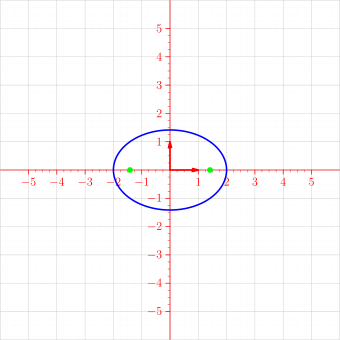

In [181]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

add(Quadricula(-6,6,-6,6));
Elipse((0,0),(1,0),4,2,x=6,y=6);

## Exercici 43
Determineu el focus i la directriu de la paràbola d'equació
$$y=\frac{x^2}{4\sqrt5}$$
i reprenteu-ho gràficament.

El vèrtex de la paràbola és el punt $(0,0)$ i el seu paràmetre $p=2\sqrt{5}$.

Per tant, el focus és el punt $F=(0,\sqrt{5})$ i la recta directriu té equació $y=-\sqrt{5}$:

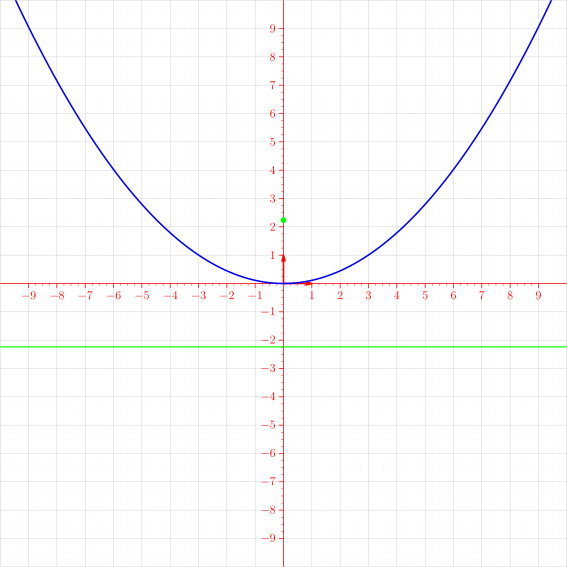

In [182]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

picture p = Quadricula(-10,10,-10,10);
add(p);
Parabola((0,0),(0,sqrt(5)),x=10,y=10);

## Exercici 44
Determineu els vèrtexs, els focus i les asímptotes de la hipèrbola d'equació
$$x^2-\frac{y^2}{4}=1 $$
i representau-la gràficament.

El centre de la hipèrbola és el punt $(0,0)$, el semieix real és $a=1$ i el semieix imaginari, $b=2$. La semidistància focal serà

In [183]:
a = 1
b = 2
c = sqrt(a^2+b^2)
show(c)

sqrt(5)

El focus són els punts $(\sqrt{5},0)$ i $(-\sqrt{5},0)$.

Els vèrtexs són $(1,0)$ i $(-1,0)$ i les asímptotes són les rectes d'equacions $y=2x$ i $y=-2x$.

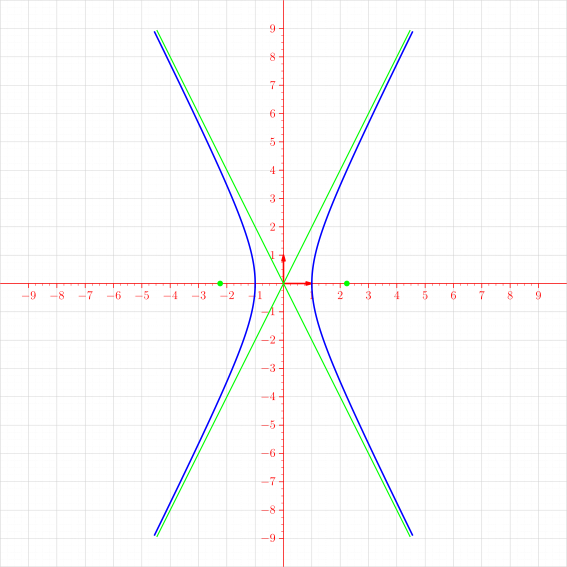

In [184]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

picture p = Quadricula(-10,10,-10,10);
add(p);
Hiperbola((0,0),(1,0),1,4,x=10,y=10);

## Exerccici 45
Trobeu el centre i els focus de la hipèrbola d'equació
$$
  4x^2-9y^2-24x+18y-9=0\,.
$$
Representeu-ho gràficament.

En primer lloc hem de completar quadrats per veure com s'escriu l'equació de la hipèrbola:

In [188]:
x, y = var('x y')
x1, y1 = var('x1 y1')
eq = 4*x^2-9*y^2-24*x+18*y-9
e, c = completa_quadrats(eq,[x,y],[x1,y1])
## show(e)
show(e/36)
show(c)

1/9*x1^2 - 1/4*y1^2 == 1

[x1 == x - 3, y1 == y - 1]

És a dir, l'equació de la hipèrbola es pot escriure de la forma següent
$$
  \frac{(x-3)^2}{9}-\frac{(y-1)^2}{4} = 1\,.
$$

El centre de la hipèrbola és el punt $C=(3,1)$, semieix real $a=3$ i el semieix imaginari $b=2$. La semidistància focal és

In [189]:
a = 3
b = 2
c = sqrt(a^2+b^2)
show(c)

sqrt(13)

Els focus són els punts $F_1=(3+\sqrt{13},1)$ i $F_2=(3-\sqrt{13},1)$. En el gràfic següent es pot veure la hipèrbola

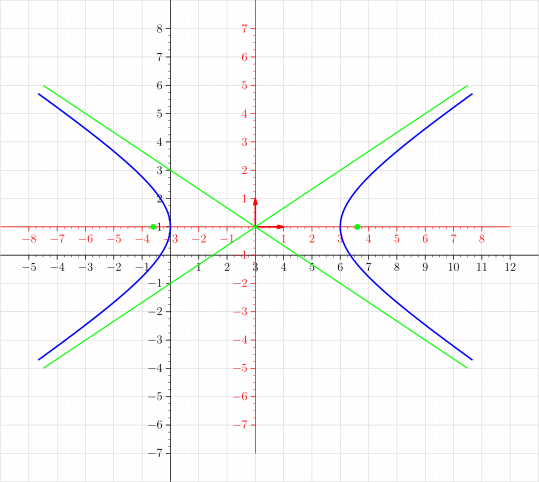

In [190]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-6,13,-8,9);
Hiperbola((3,1),(1,0),9,4,x=9,y=8);

## Exercici 46
Trobeu el centre i els focus de l'el·lipse d'equació
$$
   5x^2+2y^2-20x+12y+8=0\,.
$$
Representeu-ho gràficament.

Com a l'exercici anterior, completem quadrats:

In [191]:
x, y = var('x y')
x1, y1 = var('x1 y1')
eq = 5*x^2 + 2*y^2 - 20*x + 12*y + 8
e, c = completa_quadrats(eq,[x,y],[x1,y1])
## show(e)
show(e)
show(c)

5*x1^2 + 2*y1^2 == 30

[x1 == x - 2, y1 == y + 3]

L'equació de l'el·lipse es pot escriure com a
$$
  \frac{(x-2)^2}{6}+\frac{(y+3)^2}{15} = 1\,.
$$

El centre de l'el·lipse és el punt $C=(2,-3)$, el semieix major $a=\sqrt{15}$ i el semieix menor $b=\sqrt{6}$. Observem que el semieix major $a=\sqrt{15}$ esta dividint el terme $(y+3)^2$ i que això vol dir que els focus estaran sobre la recta $x=2$.

La semidistància focal és

In [192]:
a = sqrt(15)
b = sqrt(6)
c = sqrt(a^2-b^2)
show(c)

3

Per tant els focus són els punts $F_1=(2,0)$ i $F_2=(2,-6)$. En el gràfic següent es pot veure l'el·lipse.

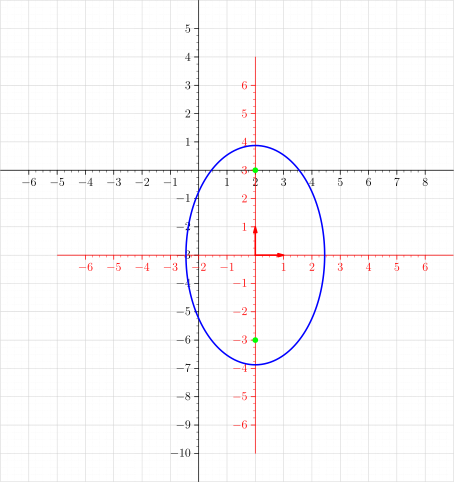

In [193]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-7,9,-11,6);
Elipse((2,-3),(1,0),6,15,x=7,y=7);

## Exercici 47
Determineu el focus, el vèrtex i la recta directriu de la paràbola
$$
  y^2+8x-4y+12=0\,.
$$
Representeu-ho gràficament.

Tornem a completar quadrats:

In [195]:
x, y = var('x y')
x1, y1 = var('x1 y1')
eq = y^2+8*x-4*y+12
e, c = completa_quadrats(eq,[x,y],[x1,y1])
## show(e)
show(e)
show(c)

x1 == -1/8*y1^2

[x1 == x + 1, y1 == y - 2]

L'equació de la paràbola és
$$
  x + 1 = -\frac{(y-2)^2}{8}\,.
$$

El vèrtex de la paràbola és el punt $V=(-1,2)$ i el paràmetre $p=4$. Com que la seva equació és
$$
  x+1=-\frac{(y-2)^2}{8}\,,
$$
el focus és el punt $F=(-3,2)$ i la recta directriu té equació $x=1$. En el gràfic següent podem veure el gràfic de la paràbola.

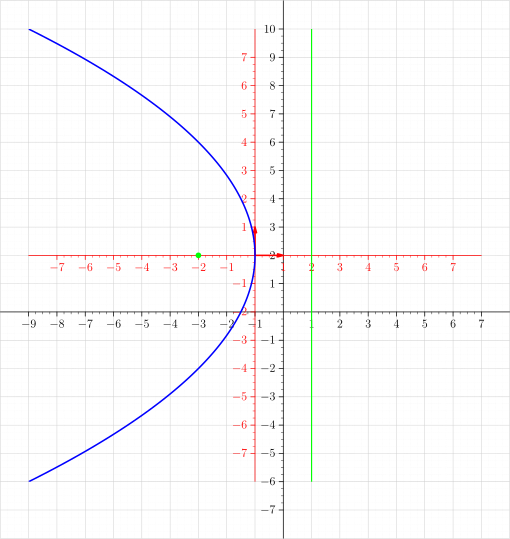

In [196]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-10,8,-8,11);
Parabola((-1,2),(-3,2),x=8,y=8);

## Exercici 48
Donada la quàdrica d'equació
$$
  40 x^{2} - 5 y^{2} - 2 z^{2} - 240 x - 20 y + 4 z + 298 = 0\,,
$$
completeu quadrats i determineu el seu tipus i el seu vèrtex o centre.

In [197]:
x, y, z = var('x y z')
x1, y1, z1 = var('x1 y1 z1')
eq = 40*x^2 - 5*y^2 - 2*z^2 - 240*x - 20*y + 4*z + 298
e, c = completa_quadrats(eq,[x,y,z],[x1,y1,z1])
## show(e)
show(-e/40)
show(c)

-x1^2 + 1/8*y1^2 + 1/20*z1^2 == -1

[x1 == x - 3, y1 == y + 2, z1 == z - 1]

L'equació de la quàdrica es pot escriure com
$$
  -(x-3)^2+\frac{(y+2)^2}{8}+\frac{(z-1)^2}{20}=-1\,.
$$
Es tracta d'un hiperboloide de dues fulles i el seu centre és el punt $(3,-2,1)$.

## Exercici 49
Donada la quàdrica d'equació
$$
  5 x^{2} + 4 z^{2} - 30 x - 200 y - 16 z + 461\,,
$$
completeu quadrats i determineu el seu tipus i el seu vèrtex o centre.

In [198]:
x, y, z = var('x y z')
x1, y1, z1 = var('x1 y1 z1')
eq = 5*x^2 + 4*z^2 - 30*x - 200*y - 16*z + 461
e, c = completa_quadrats(eq,[x,y,z],[x1,y1,z1])
## show(e)
show(e)
show(c)

y1 == 1/40*x1^2 + 1/50*z1^2

[x1 == x - 3, y1 == y - 2, z1 == z - 2]

L'equació de la quàdrica es pot escriure com
$$
  y-2=\frac{(x-3)^2}{40}+\frac{(z-2)^2}{50}\,.
$$
Es tracta d'un paraboloide el·lípticde i el seu vèrtex és el punt $(3,2,2)$.

## Exercici 50
Donada l'esfera d'equació
$$
  x^{2} + y^{2} + z^{2} + 6 x + 4 y - 2 z + 8 = 0\,,
$$
trobeu l'equació dels dos plans tangents a l'esfera i paral·lels al pla $x + y + 2 z = 1$.

L'equació del dos plans que busquem ha de ser de la forma $x + y + 2 z + D = 0$ i la condició de que un pla sigui tangent a una esfera és que la distància del centre del pla a l'esfera coincideixi amb el radi de l'esfera.

Completant quadrats podem trobar el centre i el radi de l'esfera:

In [199]:
x, y, z = var('x y z')
x1, y1, z1 = var('x1 y1 z1')
eq = x^2 + y^2 + z^2 + 6*x + 4*y - 2*z + 8 
e, c = completa_quadrats(eq,[x,y,z],[x1,y1,z1])
## show(e)
show(e)
show(c)

x1^2 + y1^2 + z1^2 == 6

[x1 == x + 3, y1 == y + 2, z1 == z - 1]

Per tant, l'equació de l'esfera es pot escriure com a
$$
  (x+3)^2+(y+2)^2+(z-1)^2=6\,,
$$
el seu centre és el punt $(-3,-2,1)$ i el seu radi $r=\sqrt{6}$.

L'equació dels dos plans serà de la forma $x+y+2z+D=0$. Com que la distància entre el punt $p=(x_0,y_0,z_0)$ i el pla d'equació $Ax+By+Cz+D=0$ és
$$
  d(p,P)=\frac{|Ax_0+By_0+Cz_0+D|}{\sqrt{A^2+B^2+C^2}}\,,
$$
tindrem que

In [200]:
x, y, z = var('x y z')
d, D = var('d D')
eq = x+y+2*z+D
d = abs(eq.subs(x=-3,y=-2,z=1))/sqrt(1+1+4)
show(d == sqrt(6))

1/6*sqrt(6)*abs(D - 3) == sqrt(6)

Aquesta equació es pot escriure de la forma següent (hem multiplicat per $6$ i dividit per $\sqrt{6}$):

In [201]:
eq = (d == sqrt(6))/sqrt(6)*6
show(eq)

abs(D - 3) == 6

És evident que les solucions d'aquesta equació s'obtenen a partir de $D-3=6$ i $D-3=-6$. Per tant, ten im que $D=9$ i $D=-3$ i les equacions dels dos plan són
$$
  x+y+2z+9=0\qquad\text{i}\qquad x+y+2z-3=0\,.
$$

## Exercici 51
Analitzeu si el sistema següent és referència euclidiana de $P_3$ i, en cas afirmatiu, determineu la seva orientació
$$
  \mathcal{R}'=\left\{(-1,1,2);\,\frac{1}{13}(-3,4,12),\frac{1}{13}(12,-3,4),\frac{1}{13}(4,12,-3)\right\}\,.
$$

Una referència de $P_3$ està formada per un punt $O\in P_3$ i una base $\vec e_1,\vec e_2,\vec e_3$ de $V_3$, $\mathcal{R}=\{O;\,\vec e_1,\vec e_2,\vec e_3\}$. Així doncs, només cal que comprovem si els tres vectors formen una base de $V_3$ i, a més, és ortonormal.

Els tres vectors de la referència són

In [202]:
e1 = 1/13*vector([-3,4,12])
e2 = 1/13*vector([12,-3,4])
e3 = 1/13*vector([4,12,-3])
show(e1)
show(e2)
show(e3)

(-3/13, 4/13, 12/13)

(12/13, -3/13, 4/13)

(4/13, 12/13, -3/13)

Escrivim la matriu del canvi de base d'aquesta base a la canònica i calculem el seu determinant

In [203]:
C = matrix([e1,e2,e3]).T
show(C.det())

1

Això ens dius que aquests tres vectors formen una base $V_3$ i que la seva orientació és positiva.

Per determinar si la base és ortogonal, hem de calcular els productes escalars dels seus vectors entre ells. La manera més senzilla de fer-ho és

In [204]:
show(C.T * C)

[1 0 0]
[0 1 0]
[0 0 1]

Per tant, $\mathcal{R}'$ és una referència euclidiana de $P_3$ amb orientació positiva.

## Exercici 52
Calculeu les coordenades del punt $(5,2)$ en la referència
$$\mathcal{R}'=\left\{ (0,-3);\,\frac15(3,-4),\frac15(4,3) \right\}\,.$$
Representeu-ho gràficament.

Hem de trobar coeficients $(x',y')$ tals que
$$
  (5,2) = (0,-3) + \frac{x'}{5}(3,-4) + \frac{y'}{5}(4,3)\,.
$$

In [208]:
x1, y1 = var('x1 y1')
eqs = [3*x1/5 + 4*y1/5 == 5,-4*x1/5 + 3*y1/5 - 3 == 2]
show(eqs)

[3/5*x1 + 4/5*y1 == 5, -4/5*x1 + 3/5*y1 - 3 == 2]

In [209]:
show(solve(eqs,[x1,y1]))

[[x1 == -1, y1 == 7]]

Les coordenades de $p$ en la referència $\mathcal{R}'$ són $(-1,7)$, és a dir, $p=(5,2)=(-1,7)_{\mathcal{R}'}$.

Una altra manera d'obtenir el mateix resultat és utilitzar les equacions del canvi de coordenades de $\mathcal{R}'$ a la referència canònica:
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} 0 \\ -3 \end{array}\right) 
  + \frac{1}{13}\left(\begin{array}{rr}
   3 & 4 \\
  -4 & 3 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right) 
  \qquad\text{i, aleshores}\qquad
  \left(\begin{array}{c} 5 \\ 2 \end{array}\right) 
  = \left(\begin{array}{r} 0 \\ -3 \end{array}\right) 
  + \frac{1}{13}\left(\begin{array}{rr}
   3 & 4 \\
  -4 & 3 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right) 
$$

Aleshores,

In [210]:
B = vector([0,-3])
C = 1/5*matrix([[3,4],[-4,3]])
p = vector([5,2])
p1 = C.inverse() * (p - B)
show(p1)

(-1, 7)

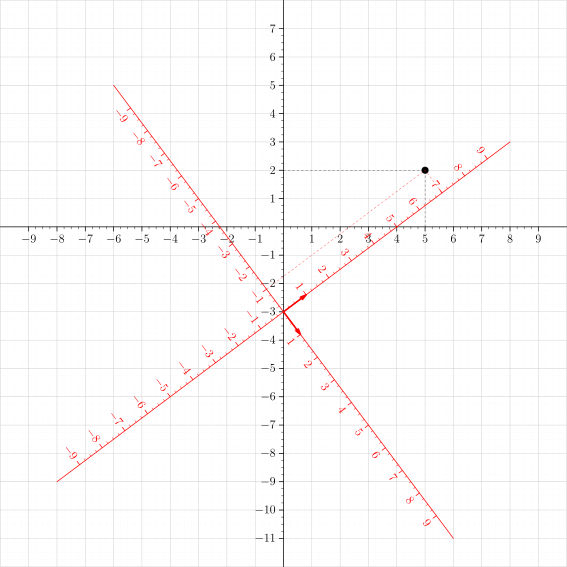

In [211]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

pair F = (5,2),
     O = (0,-3),
     u1 = 1/5*(3,-4),
     u2 = 1/5*(4,3);  

Canonica(-10,10,-12,8);
picture p = Coordenades(-10,10,-10,10,color=red,base=true,quadricula=false);
transform tr = Referencia(O,u1,u2);
pair F1 = inverse(tr)*F;
dot(p,F1,black+2.5mm);
draw(p,(F1.x,0)--F1--(0,F1.y),linetype("8 8 8 8")+linewidth(0.1mm)+red);
draw((F.x,0)--F--(0,F.y),linetype("8 8 8 8")+linewidth(0.1mm)+black);
add (tr*p);

## Exercici 53
Representeu gràficament la recta que en la referència
$$
  \mathcal{R}'=\left\{(2,1);\,\frac{1}{\sqrt{2}}(1,1),\frac{1}{\sqrt{2}}(-1,1)\right\}
$$
té equació $2x'-3y'+6=0$.

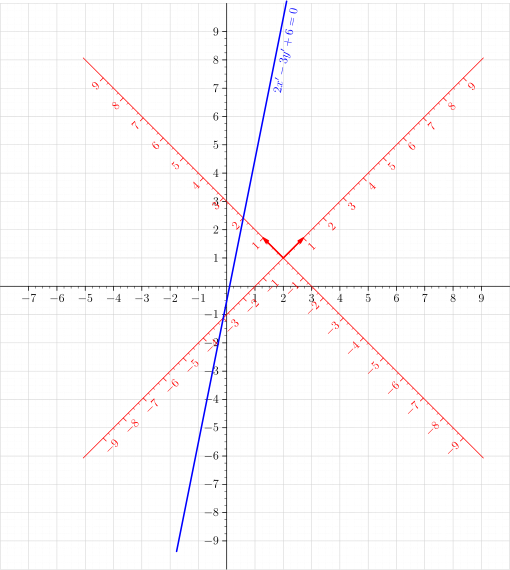

In [212]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

real f(real x1)
{
    return (2*x1+6)/3;
}

pair O = (2,1),
     u1 = 1/sqrt(2)*(1,1),
     u2 = 1/sqrt(2)*(-1,1);

Canonica(-8,10,-10,10);
picture p = Coordenades(-10,10,-10,10,color=red,base=true,quadricula=false);
transform tr = Referencia(O,u1,u2);
draw(p,(-10,f(-10))--(6.5,f(6.5)),blue+linewidth(0.55mm));
label(p,rotate(degrees(atan2(2,3)))*"$2x'-3y'+6=0$",(4.8,f(4.8)),SE,blue);
add(tr*p);

## Exercici 54
Determineu l'angle que formen la recta i el pla d'equacions respectives
$$
  \dfrac{x'+2}{2}=\dfrac{y'-3}{-1}=\dfrac{z'}{2} \qquad \text{i} \qquad -x'+2y'+2z'=-1
$$
en la referència $\mathcal{R}'=\left\{(2,-1,3);\,\frac13(-1,2,2),\frac13(2,-1,2),\frac13(2,2,-1)\right\}$.

De manera semblant a l'exercici anterior, la primera recta passa pel punt $p=(-2,3,0)_{\mathcal{R}'}$ i té vector director $\vec u=(2,-1,2)_{\mathcal{B}'}$, mentre que el pla passa el punt $q=(1,0,0)_{\mathcal{R}'}$ i té vector associat (la referència és euclidiana) $\vec w=(-1,2,2)_{\mathcal{B}'}$. Com que la referència és euclidiana, podem calcular el producte escalar de $\vec u$ i $\vec w$ de la forma següent:

In [213]:
u = vector([2,-1,2])
w = vector([-1,2,2])
show(u * w)

0

Aleshores, la recta i el pla són parel·lels. Per saber si la recta esta inclosa al pla, podem resoldre el sistema

In [214]:
x1, y1, z1 = var('x1 y1 z1')
show(solve([-x1 + 2*y1 + 2*z1 == -1,(x1+2)/2==(y1-3)/(-1),(x1+2)/2==z1/2],[x1,y1,z1]))

[]

Com que la recta i el pla no es tallen, són estrictament paral·les i formen un angle de $0^\circ$.

## Exercici 55
Trobeu l'angle entre la recta i el pla que tenen equacions respectives
$$\dfrac{x'+6}{2}=\dfrac{y'-8}{-5}=\dfrac{z'-7}{5} \qquad \text{i} \qquad x'-y'+2z'=1$$
en la referència $\mathcal{R}'=\{(1,-2,3);\,(1,1,1),(1,1,0),(1,0,0)\}$.

El primer que hem de fer és calcular les components del vector director de la recta i del vector associat al pla en la base canònica. D'entrada, sabem que
el vector director de la recta és $\vec u=(2,-5,5)_{\mathcal{B}'}$ i que dos vectors directors del pla són $\vec v_1=(1,1,0)_{\mathcal{B}'}$ i $(2,0,-1)_{\mathcal{B}'}$. Calculem les seves components en la base canònica.

In [215]:
e1 = vector([1,1,1])
e2 = vector([1,1,0])
e3 = vector([1,0,0])
u1 = vector([2,-5,5])
v11 = vector([1,1,0])
v21 = vector([2,0,-1])

Calculem les components dels vectors $\vec u$, $\vec v_1$ i $\vec v_2$ en la base canónica

In [217]:
C = matrix([e1,e2,e3]).T
u = C * u1
v1 = C * v11
v2 = C * v21
show(u)
show(v1)
show(v2)

(2, -3, 2)

(2, 2, 1)

(1, 2, 2)

Per acabar, obtenim l'angle entre la recta i el pla

In [218]:
w = v1.cross_product(v2)
alfa = pi/2 - acos(abs(u * w) / simplificar_radicals(u.norm() * w.norm()))
show(alfa)

1/2*pi

L'angle entre la recta i el pla és de $\dfrac{\pi}{2}$, és a dir, són perpendiculars.

## Exercici 56
Determineu la distància que hi ha entre el punt $(1,2)$
i la recta que té equació 
$$x'-3y'=0$$
en la referència $\mathcal{R}'=\{(0,-1);\,\frac{1}{\sqrt5}(2,1),\frac{1}{\sqrt5}(-1,2)\}$. Representeu-ho gràficament.

Calculem en primer lloc les coordenades de $p=(1,2)$ en la referència $\mathcal{R}'$:

In [220]:
p = vector([1,2])
B = vector([0,-1])
u1 = 1/sqrt(5)*vector([2,1])
u2 = 1/sqrt(5)*vector([-1,2])
C = matrix([u1,u2]).T
show(C)

[ 2/5*sqrt(5) -1/5*sqrt(5)]
[ 1/5*sqrt(5)  2/5*sqrt(5)]

In [229]:
p0 = C.inverse() * (p - B)
show(p0)

(sqrt(5), sqrt(5))

Com que la referència és euclidiana o rectangular, calculem la projecció ortogonal de $p=(\sqrt{5},\sqrt{5})_{\mathcal{R}'}$ sobre la recta $R$ d'equació $x'-3y'=0$ en la referència $\mathcal{R}'$. És evident que l'equació (també en la referència $\mathcal{R}'$) de la recta perpendicular a $R$ que passa pel punt $p$ és
$$
  3x'+y'=4\sqrt{5}\,.
$$
La intersecció de les dues rectes és

In [222]:
x1, y1 = var('x1 y1')
sol = solve([x1-3*y1==0,3*x1+y1==4*sqrt(5)],[x1,y1])
show(sol)

[[x1 == 6/5*sqrt(5), y1 == 2/5*sqrt(5)]]

La projecció ortogonal de $p$ sobre la recta $R$ és el punt
$$
  \frac{1}{5}(6\sqrt{5},2\sqrt{5})_{\mathcal{R}'}\,.
$$
Finalment, calculem la distància $d(p,R)$

In [230]:
p1 = sqrt(5)/5*vector([6,2])
show((p1-p0).norm())

sqrt(2)

Per tant, $d(p,R)=\sqrt{2}$.

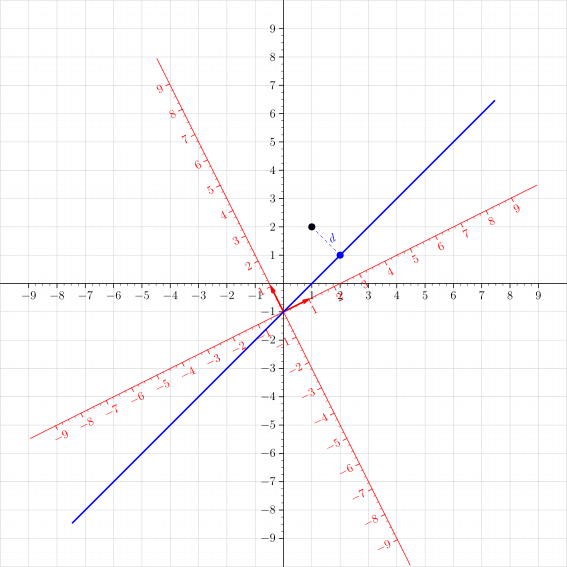

In [231]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

real f(real x)
{
    return x/3;
}

pair F = (1,2),
     O = (0,-1),
     u1 = 1/sqrt(5)*(2,1),
     u2 = 1/sqrt(5)*(-1,2);

line l1 = line(1,-3,0);    
Canonica(-10,10,-10,10);    
picture p = Coordenades(-10,10,-10,10,color=red,base=true,quadricula=false);
transform tr = Referencia(O,u1,u2);
draw(p,(-10,f(-10))--(10,f(10)),blue+linewidth(0.55mm));
pair F1 = inverse(tr)*F;
dot(p,F1,black+2.5mm);
line l2 = perpendicular(F1,l1);
pair P = intersectionpoint(l1,l2);
dot(p,P,blue+2.5mm);
draw(p,F1--P,linetype("8 8 8 8")+linewidth(0.15mm)+blue);
label(p,"$d$",(F1+P)/2,E,blue);
add(tr*p);

## Exercici 57
Calculeu la distància del punt $(1,2)$ a la recta d'equació 
$$x'+2y'=0$$
en la referència $\mathcal{R}'=\{(3,1);\,(1,3),(2,1)\}$.

Com que la referència $\mathcal{R}'$ no és euclidiana, clacularem l'equació de la recta en la referència canònica. La fórmula del canvi de coordenades de  $\mathcal{R}'$ a la referència canònica és
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} 3 \\ 1 \end{array}\right) 
  + \left(\begin{array}{rr}
   1 & 2 \\
   3 & 1 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\qquad\text{o}\qquad X=A+CX'\,.
$$
Si aïllem $X'$, tindrem que $X' = C^{-1}\big(X-A\big)$.

In [232]:
B = vector([3,1])
C = matrix([[1,2],[3,1]])
show(C)

[1 2]
[3 1]

In [233]:
x1, y1 = var('x1 y1')
eq1 = x1 + 2*y1 == 0
show(eq1)

x1 + 2*y1 == 0

Calculem l'equació de la recta en la referència canònica:

In [234]:
x, y = var('x y')
X = vector([x,y])
x1, y1 = C.inverse() * (X - B)
show(x1)
show(y1)

-1/5*x + 2/5*y + 1/5

3/5*x - 1/5*y - 8/5

In [235]:
eq = eq1.subs(x1=x1,y1=y1).expand()
show(eq)

x - 3 == 0

L'equació de la recta en la referència canònica és $x=3$ i és evident que la distància del punt $(1,2)$ a aquesta recta és $d=2$.

## Exercici 58
Els vectors de la base $\mathcal{B}'=\{\vec e_1,\vec e_2\}$ compleixen que $\vec e_1\cdot\vec e_1=3$, $\vec e_1\cdot\vec e_2=-1$ i $\vec e_2\cdot\vec e_2=2$. Donades la recta $R$ d'equació $4x'-3y'=1$ en la referència $\mathcal{R}'=\{o;\,\vec e_1,\vec e_2\}$ i el punt $p=(5,-3)_{\mathcal{R}'}$, calculeu la distància del punt $p$ a la recta $R$.

Com que la referència $\mathcal{R}'$ no és rectangular, no podem aplicar cap fórmula per al càlcul de la distància. 
Així doncs, hem de trobar la projecció ortogonal de $p$ sobre la recta $R$.

En primer lloc, el vector director de la recta $R$ és $\vec u=(3,4)_{\mathcal{B}'}$ i hem de trobar un vector $\vec v$ perpendicular a $\vec u$. 
Si posem $\vec v=(a,b)_{\mathcal{B}'}$, tindrem que
$$
  \vec u\cdot\vec v = \left(\begin{array}{rr}3 & 4\end{array}\right)
  G\left(\begin{array}{r}a \\ b\end{array}\right)\,,
$$
on $G$ és la matriu de Gram de la base $\mathcal{B}'$.

In [236]:
G = matrix([[3,-1],[-1,2]])
show(G)

[ 3 -1]
[-1  2]

El producte escalar dels vectors $\vec u$ i $\vec v$ és

In [237]:
a, b = var('a b')
u = vector([3,4])
v = vector([a,b])
show(u*G*v)

5*a + 5*b

Podem prendre $a=1$ i $b=-1$ i així els vectors $\vec u=(3,4)_{\mathcal{B}'}$ i $\vec u=(1,-1)_{\mathcal{B}'}$ són perpendiculars. Ara la recta perpendicular a $R$ que passa per $p$ tindrà equació $x'+y'=2$.

A continuació calculem la intersecció de les dues rectes:

In [242]:
x1, y1 = var('x1 y1')
eq1 = 4*x1-3*y1==1
eq2 = x1-5 == (y1+3)/(-1)
show(solve([eq1,eq2],[x1,y1]))

[[x1 == 1, y1 == 1]]

Per tant, la projecció ortogonal del punt $p$ sobre la recta $R$ és el punt $p'=(1,1)$ i la distància entre el punt $p$ i la recta $R$ és

In [239]:
p = vector([5,-3])
p1 = vector([1,1])
w = p1-p
d = sqrt(w*G*w)
show(d)

4*sqrt(7)

Per tant, $d(p,R)=4\sqrt{7}$.

Per fer una possible representació gràfica, calculem l'angle entre els vector $\vec e_1$ i $\vec e_2$

In [240]:
alfa = N(acos(-1/(sqrt(3)*sqrt(2)))*180/pi)
show(alfa)

114.094842552111

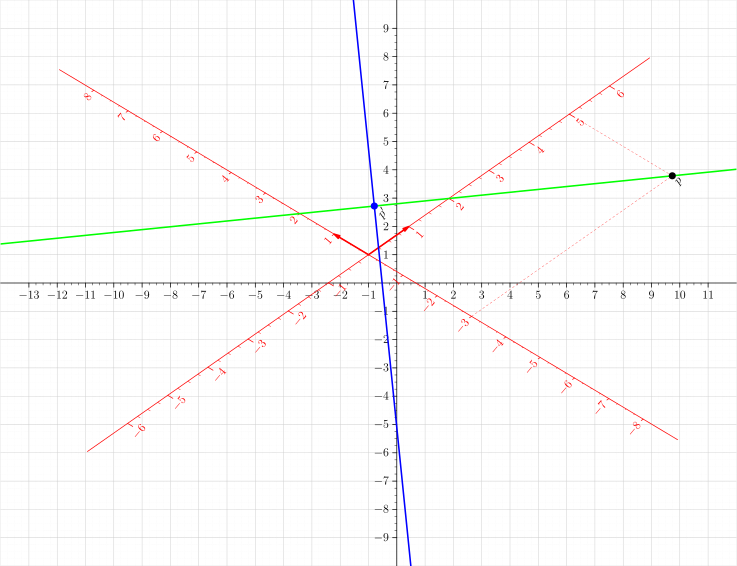

In [241]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

real alfa = acos(-1/sqrt(6));
pair o = (0,0),
     F = (5,-3),
     F1 = (1,1);

real f(real x) {
    return (4*x-1)/3;
}

real g(real x) {
    return 2-x;
}

Canonica(-14,12,-10,10);
path cl = (-14,-10)--(12,-10)--(12,10)--(-14,10)--cycle;
picture p = Coordenades(-7,7,-9,9,color=red,ticky=0.05,base=true,quadricula=false);
draw(p,(-7,f(-7))--(7,f(7)),blue+linewidth(0.55mm));
draw(p,(-7,g(-7))--(7,g(7)),green+linewidth(0.55mm));
draw(p,(F.x,0)--F--(0,F.y),linetype("8 8 8 8")+linewidth(0.1mm)+red);
dot(p,F,black+2.5mm);
label(p,"$p$",F,1.5S);
dot(p,F1,blue+2.5mm);
label(p,"$p'$",F1,1.5S);
transform tr = Referencia((-1,1),(sqrt(3),0),sqrt(2)*(cos(alfa),sin(alfa)));
add(rotate(35,(-1,1)) * tr * p);
clip(cl);

## Exercici 59
Trobeu l'equació de la cònica d'equació 
$$
  x^{2} + y^{2} - 2 x y - 26 x - 6 y + 9 = 0
$$
en la referència $\mathcal{R}'=\left\{(2,-3);\frac{1}{\sqrt{2}}(1,-1),\frac{1}{\sqrt{2}}(1,1)\right\}$.

Les equacions del canvi de referència són
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} 2 \\ -3 \end{array}\right) 
  + \frac{1}{\sqrt{2}}\left(\begin{array}{rr}
   1 & 1 \\
  -1 & 1 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)
$$

In [256]:
x, y = var('x y')
x1, y1 = var('x1 y1')
eq = x^2 + y^2 - 2*x*y - 26*x - 6*y + 9 == 0
show(eq)

x^2 - 2*x*y + y^2 - 26*x - 6*y + 9 == 0

In [257]:
B = vector([2,-3])
X1 = vector([x1,y1])
C = 1/sqrt(2)*matrix([[1,1],[-1,1]])
show(C)

[ 1/2*sqrt(2)  1/2*sqrt(2)]
[-1/2*sqrt(2)  1/2*sqrt(2)]

In [258]:
x, y = B + C * X1
show(x)
show(y)

1/2*sqrt(2)*x1 + 1/2*sqrt(2)*y1 + 2

-1/2*sqrt(2)*x1 + 1/2*sqrt(2)*y1 - 3

In [259]:
eq1 = eq.subs(x=x,y=y).expand()
show(eq1)

2*x1^2 - 16*sqrt(2)*y1 == 0

Per tant, l'equació és
$$
  2x'^2-16\sqrt{2}\,y'=0\qquad\text{o bé}\qquad y'=\frac{x'^2}{8\sqrt{2}}\,,
$$
és a dir, és una paràbola.

## Exercici 60
Trobeu l'equació de la quàdrica d'equació 
$$
  3 x^{2} + 3 y^{2} + 5 z^{2} + 2 x y - 6 x z + 6 y z - 6 x - 2 y + 22 z + 3 = 0
$$
en la referència $\mathcal{R}'=\left\{(4,-3,2);\frac{1}{\sqrt{2}}(1,1,0),\frac{1}{\sqrt{6}}(1,-1,-2),\frac{1}{\sqrt{3}}(-1,1,-1)\right\}$.

Les equacions del canvi de referència són
$$
  \left(\begin{array}{c} x \\ y \\ z\end{array}\right) 
  = \left(\begin{array}{r} 4 \\ -3 \\ 2\end{array}\right) 
  + \frac{1}{\sqrt{6}}\left(\begin{array}{crc}
   \sqrt{3} &  1 & -\sqrt{2} \\
   \sqrt{3} & -1 &  \sqrt{2} \\
      0     & -2 & -\sqrt{2}
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \\ z' \end{array}\right)
$$

In [271]:
x, y, z = var('x y z')
x1, y1, z1 = var('x1 y1 z1')
eq =  3*x^2 + 3*y^2 + 5*z^2 + 2*x*y - 6*x*z + 6*y*z - 6*x - 2*y + 22*z + 3 == 0
show(eq)

3*x^2 + 2*x*y + 3*y^2 - 6*x*z + 6*y*z + 5*z^2 - 6*x - 2*y + 22*z + 3 == 0

In [270]:
B = vector([4,-3,2])
u1 = 1/sqrt(2)*vector([1,1,0])
u2 = 1/sqrt(6)*vector([1,-1,-2])
u3 = 1/sqrt(3)*vector([-1,1,-1])
C = matrix([u1,u2,u3]).T
show(C)

[ 1/2*sqrt(2)  1/6*sqrt(6) -1/3*sqrt(3)]
[ 1/2*sqrt(2) -1/6*sqrt(6)  1/3*sqrt(3)]
[           0 -1/3*sqrt(6) -1/3*sqrt(3)]

In [272]:
X1 = vector([x1,y1,z1])
x, y, z = B + C * X1
show(x)
show(y)
show(z)

1/2*sqrt(2)*x1 + 1/6*sqrt(6)*y1 - 1/3*sqrt(3)*z1 + 4

1/2*sqrt(2)*x1 - 1/6*sqrt(6)*y1 + 1/3*sqrt(3)*z1 - 3

-1/3*sqrt(6)*y1 - 1/3*sqrt(3)*z1 + 2

In [274]:
eq1 = simplificar_radicals(eq.subs(x=x,y=y,z=z).expand())
show(1/16*eq1)

1/4*x1^2 + 1/2*y1^2 - 1/16*z1^2 + 1 == 0

L'equació de la quàdrica en la referència $\mathcal{R}'$ és
$$
  \frac{x'^2}{4} + \frac{y'^2}{2} - \frac{z'^2}{16} = -1\,,
$$
és a dir, és un hiperboloide de dues fulles.

## Exercici 61

En el pla $XZ$, es considera la paràbola d'equació
$$
  z = \frac{x^{2}}{3} - 3 \,.
$$
Si la fem girar al voltant de l'eix de les $x$, quina serà l'equació de la superfície de revolució resultant?

Cada punt $X=(x,y,z)$ de la superfície de revolució s'obté a partir d'un punt $P=(t,0,t^2/3-3)$ de la paràbola de partida i, en girar al voltant de l'eix de les $x$, el centre de la circumferència que descriu el punt $P$ és el punt $C=(t,0,0)$.

In [283]:
t, x, y, z = var('t x y z')
X = vector([x,y,z])
show(X)

(x, y, z)

In [284]:
P = vector([t,0,t^2/3-3])
show(P)

(t, 0, 1/3*t^2 - 3)

In [285]:
C = vector([t,0,0])
show(C)

(t, 0, 0)

In [287]:
CX = X - C
CP = P - C
show(CX)
show(CP)

(-t + x, y, z)

(0, 0, 1/3*t^2 - 3)

In [290]:
eq1 = CX[0]^2 + CX[1]^2 + CX[2]^2 - (CP[0]^2 + CP[1]^2 + CP[2]^2)  == 0
show(eq1)

-1/9*(t^2 - 9)^2 + (t - x)^2 + y^2 + z^2 == 0

Els punts $X$, $P$ i $C$ estan en el pla $x=t$.

In [297]:
eq = eq1.subs(t = x).expand()
## show(eq)
show(-9*eq)

x^4 - 18*x^2 - 9*y^2 - 9*z^2 + 81 == 0

L'equació és $(x^{2}-9)^2 -9y^2 - 9z^2 = 0$, o bé, $x^{4} - 18x^{2} - 9y^{2} - 9z^{2} + 81 = 0$.

## Exercici 62

En el pla $YZ$, es considera l'el·lipse d'equació
$$
  \frac{(y-5)^2}{36}+\frac{(z-12)^2}{9}=1\,.
$$
Si la fem girar al voltant de l'eix de les $y$, quina serà l'equació de la superfície de revolució, anomenada tor, resultant?

Cada punt $X=(x,y,z)$ de la superfície de revolució s'obté a partir d'un punt $P=(0,t,s)$ de la l'el·lipse de partida i, en girar al voltant de l'eix de les $y$, el centre de la circumferència que descriu el punt $P$ és el punt $C=(0,t,0)$.

In [328]:
t, s, x, y, z = var('t s x y z')
X = vector([x,y,z])
show(X)

(x, y, z)

In [329]:
P = vector([0,t,s])
show(P)

(0, t, s)

In [330]:
C = vector([0,t,0])
show(C)

(0, t, 0)

In [331]:
CX = X - C
CP = P - C
show(CX)
show(CP)

(x, -t + y, z)

(0, 0, s)

In [337]:
eq1 = CX[0]^2 + CX[1]^2 + CX[2]^2 - (CP[0]^2 + CP[1]^2 + CP[2]^2) == 0
show(eq1)

-s^2 + (t - y)^2 + x^2 + z^2 == 0

Els punts $X$, $P$ i $C$ estan en el pla $y=t$.

In [338]:
eq1 = eq1.subs(t = y)
show(eq1)

-s^2 + x^2 + z^2 == 0

D'altra banda, el punt $P$ compleix que
$$
  \frac{(t-5)^2}{36}+\frac{(s-12)^2}{9} = 1\,.
$$

In [344]:
eq = (t-5)^2/36 + (s-12)^2/9 - 1 
show(eq)

1/9*(s - 12)^2 + 1/36*(t - 5)^2 - 1

In [345]:
eq = eq.subs(t=y)
show(eq)

1/9*(s - 12)^2 + 1/36*(y - 5)^2 - 1

Finalment, tenim que

In [346]:
eq = 36*eq.subs(s=sqrt(x^2+z^2)).expand()
show(eq)

4*x^2 + y^2 + 4*z^2 - 10*y - 96*sqrt(x^2 + z^2) + 565

In [347]:
drt = 96*sqrt(x^2+z^2)
esq = eq + drt
show(esq)

4*x^2 + y^2 + 4*z^2 - 10*y + 565

In [348]:
eq = esq^2 == drt^2
show(eq)

(4*x^2 + y^2 + 4*z^2 - 10*y + 565)^2 == 9216*x^2 + 9216*z^2

## Exercici 63

En el pla $XY$, es considera la gràfica de la funció
$$
  x = 6+3\sin y\,.
$$
Si la fem girar al voltant de l'eix de les $y$, quina serà l'equació de la superfície de revolució resultant?

Cada punt $X=(x,y,z)$ de la superfície de revolució s'obté a partir d'un punt $P=(6+3\sin t,t,0)$ de la gràfica de partida i, en girar al voltant de l'eix de les $y$, el centre de la circumferència que descriu el punt $P$ és el punt $C=(0,t,0)$.

In [349]:
t, x, y, z = var('t x y z')
X = vector([x,y,z])
show(X)

(x, y, z)

In [350]:
P = vector([6+3*sin(t),t,0])
show(P)

(3*sin(t) + 6, t, 0)

In [351]:
C = vector([0,t,0])
show(C)

(0, t, 0)

In [352]:
CX = X - C
CP = P - C
show(CX)
show(CP)

(x, -t + y, z)

(3*sin(t) + 6, 0, 0)

In [353]:
eq1 = CX[0]^2 + CX[1]^2 + CX[2]^2 - (CP[0]^2 + CP[1]^2 + CP[2]^2) == 0
show(eq1)

(t - y)^2 + x^2 + z^2 - 9*(sin(t) + 2)^2 == 0

Els punts $X$, $P$ i $C$ estan en el pla $y=t$.

In [355]:
eq = eq1.subs(t = y).expand()
show(eq)

x^2 + z^2 - 9*sin(y)^2 - 36*sin(y) - 36 == 0

## Exercici 64

Donada la recta d'equacions implícites
$$
  \left.\begin{aligned}
  x + z &= 4\\
  y - 2z &= 2
  \end{aligned}\,\right\}\,,
$$
la fem girar al voltant de l'eix de les $z$. Quina serà l'equació de la superfície de revolució resultant?

En primer lloc, és evident que unes equaqcions paramètriques de la recta són
$$
  \left.\begin{aligned}
   x &= 4 - t\\
   y &= 2+2t\\
   z &= t
  \end{aligned}\,\right\}\,,
$$
que cada punt $X=(x,y,z)$ de la superfície de revolució s'obté a partir d'un punt de la recta $P=(4-t,2+2t,t)$ i que, en girar al voltant de l'eix de les $z$, el centre de la circumferència que descriu el punt $P$ és el punt $C=(0,0,t)$.

In [356]:
t, x, y, z = var('t x y z')
X = vector([x,y,z])
show(X)

(x, y, z)

In [362]:
P = vector([4-t,2+2*t,t])
show(P)

(-t + 4, 2*t + 2, t)

In [363]:
C = vector([0,0,t])
show(C)

(0, 0, t)

In [364]:
CX = X - C
CP = P - C
show(CX)
show(CP)

(x, y, -t + z)

(-t + 4, 2*t + 2, 0)

In [365]:
eq1 = CX[0]^2 + CX[1]^2 + CX[2]^2 - (CP[0]^2 + CP[1]^2 + CP[2]^2) == 0
show(eq1)

(t - z)^2 - 4*(t + 1)^2 - (t - 4)^2 + x^2 + y^2 == 0

Els punts $X$, $P$ i $C$ estan en el pla $z=t$.

In [366]:
eq = eq1.subs(t = z).expand()
show(eq)

x^2 + y^2 - 5*z^2 - 20 == 0

In [367]:
show(eq/20)

1/20*x^2 + 1/20*y^2 - 1/4*z^2 - 1 == 0

És un hiperboloide d'una fulla.